

# **0. 기본 라이브러리 설정 및 데이터 불러오기**



In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
#여기까지 실행하고 런타임 재시작
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023_빅콘테스트/2023빅콘테스트_어드밴스드리그_예술의전당.csv')

In [6]:
df.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211003,1550,...,0,초대권,1120,NaN,20210823.0,독주,리사이틀홀,90,15,N
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220917,1520,...,0,초대권,2283,20220911.0,20220911.0,독주,IBK챔버홀,80,15,N
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190630,1132,...,0,초대권,2798,NaN,20190701.0,독주,리사이틀홀,90,15,N
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920868 entries, 0 to 1920867
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   age                float64
 1   gender             object 
 2   membership_type_1  object 
 3   membership_type_2  object 
 4   membership_type_3  object 
 5   membership_type_4  object 
 6   membership_type_5  object 
 7   membership_type_6  float64
 8   tran_date          int64  
 9   tran_time          int64  
 10  play_date          int64  
 11  play_st_time       int64  
 12  seat               object 
 13  price              int64  
 14  ticket_cancel      int64  
 15  discount_type      object 
 16  performance_code   int64  
 17  pre_open_date      float64
 18  open_date          float64
 19  genre              object 
 20  place              object 
 21  running_time       int64  
 22  intermission       int64  
 23  member_yn          object 
dtypes: float64(4), int64(9), object(11)
memory usage: 

# **1. 콘서트홀이 아닌 데이터 삭제**

In [8]:
df = df[df['place']=='콘서트홀']

In [9]:
df.place.value_counts()

콘서트홀    1096968
Name: place, dtype: int64

# **2. 기본 변수들 시각화를 통해 특징 분석**

무료    230450
골드    130605
블루    123812
Name: membership_type_1, dtype: int64


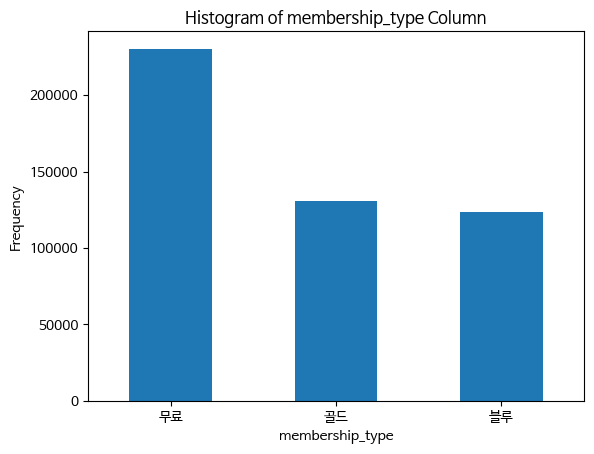

무료      193703
그린       65619
싹틔우미     62865
골드       60714
노블        6836
Name: membership_type_2, dtype: int64


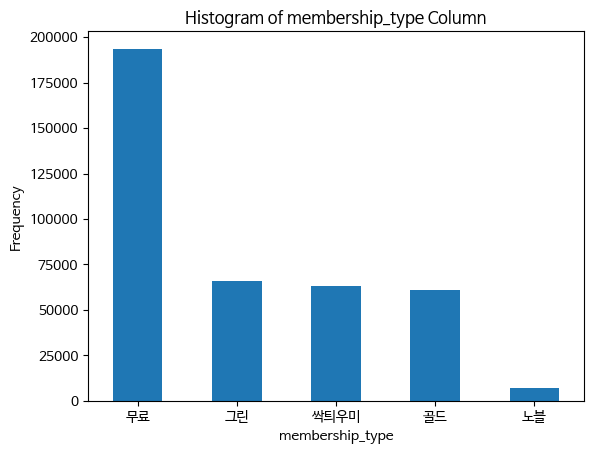

그린      61287
무료      60714
싹틔우미    10322
노블       8145
Name: membership_type_3, dtype: int64


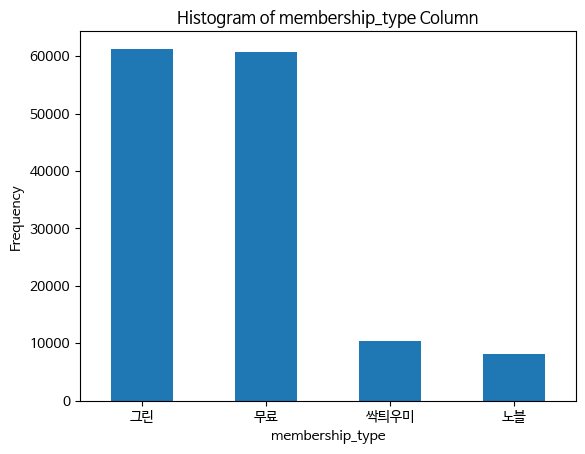

그린      19554
싹틔우미     2910
노블       2696
Name: membership_type_4, dtype: int64


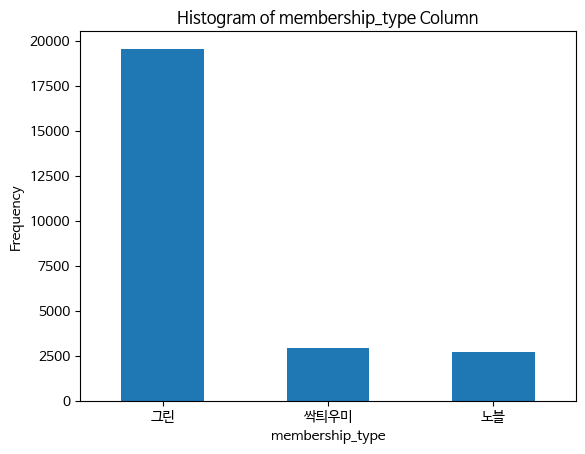

그린    1110
Name: membership_type_5, dtype: int64


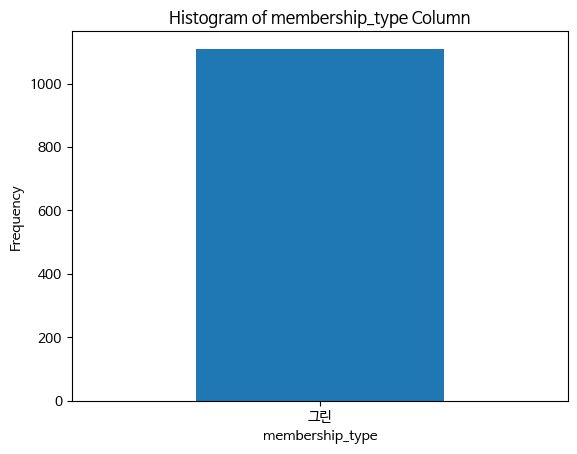

In [10]:
for i in df.columns[2:7]:
  print(df[i].value_counts())
  df[i].value_counts().plot(kind='bar')
  plt.xlabel('membership_type')
  plt.ylabel('Frequency')
  plt.xticks(rotation=0)
  plt.title('Histogram of membership_type Column')
  plt.show()

In [11]:
# membership_type_6은 전부 null값이므로 제거한다.
df['membership_type_6'].value_counts()

Series([], Name: membership_type_6, dtype: int64)

In [12]:
df.drop(columns=['membership_type_6'], inplace=True)
df.columns

Index(['age', 'gender', 'membership_type_1', 'membership_type_2',
       'membership_type_3', 'membership_type_4', 'membership_type_5',
       'tran_date', 'tran_time', 'play_date', 'play_st_time', 'seat', 'price',
       'ticket_cancel', 'discount_type', 'performance_code', 'pre_open_date',
       'open_date', 'genre', 'place', 'running_time', 'intermission',
       'member_yn'],
      dtype='object')

In [13]:
df['age'].value_counts()

50.0    115543
40.0    114612
30.0     85729
60.0     77729
20.0     59081
70.0     21729
80.0      6321
10.0      3773
Name: age, dtype: int64

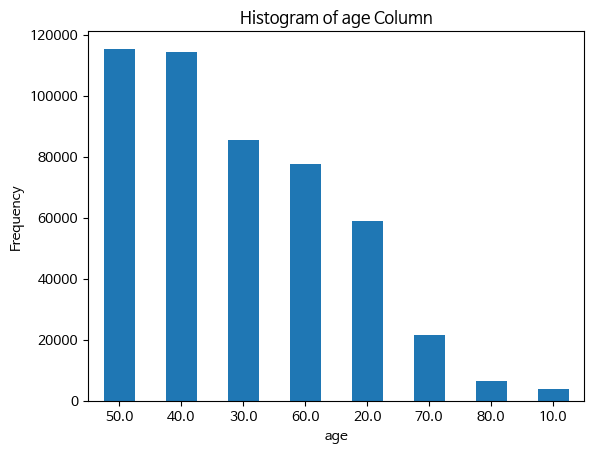

In [14]:
df['age'].value_counts().plot(kind='bar')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.title('Histogram of age Column')
plt.show()

In [15]:
df['seat'].value_counts()

1층 C블록13열 1    830
1층 C블록4열 2     815
1층 C블록4열 8     788
1층 C블록4열 4     782
1층 C블록2열 6     775
              ... 
1층 C블록22열 6     24
2층 A블록8열 13      8
2층 E블록8열 13      8
2층 A블록8열 12      8
2층 E블록8열 12      6
Name: seat, Length: 2509, dtype: int64

교향곡      522271
클래식      236966
합창       112297
독주        63503
성악        40385
실내악       34129
콘서트       23918
오페라       21707
복합장르       8705
기타         5843
재즈         1080
크로스오버       967
가족극         124
Name: genre, dtype: int64


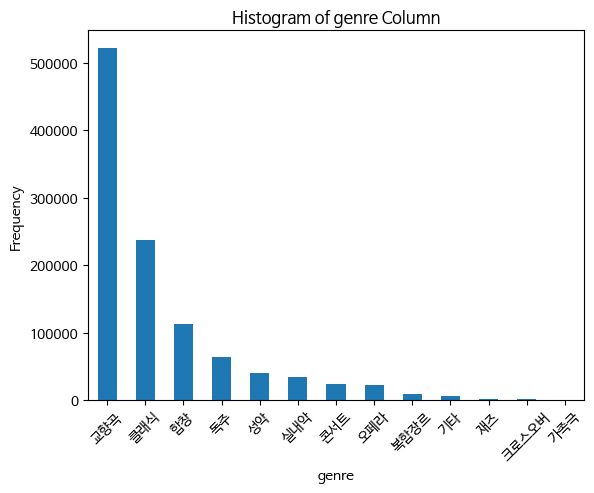

In [16]:
print(df['genre'].value_counts())
df['genre'].value_counts().plot(kind='bar')
plt.xlabel('genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Histogram of genre Column')
plt.show()

콘서트홀    1096968
Name: place, dtype: int64


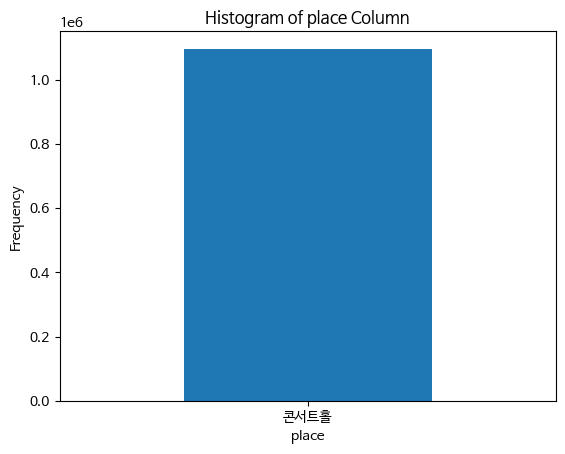

In [17]:
print(df['place'].value_counts())
df['place'].value_counts().plot(kind='bar')
plt.xlabel('place')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.title('Histogram of place Column')
plt.show()

N    612451
Y    484517
Name: member_yn, dtype: int64


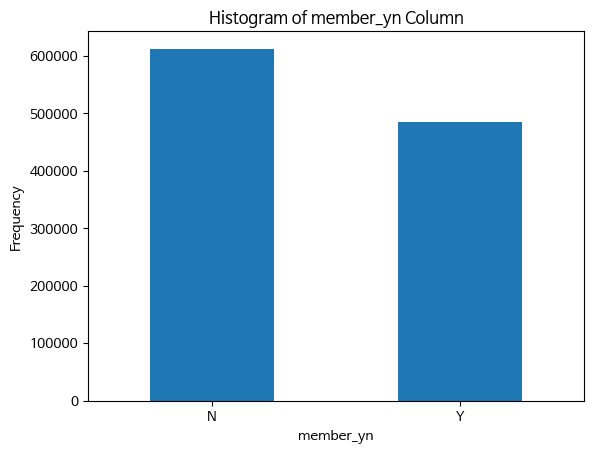

In [18]:
print(df['member_yn'].value_counts())
df['member_yn'].value_counts().plot(kind='bar')
plt.xlabel('member_yn')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.title('Histogram of member_yn Column')
plt.show()

# **3. 멤버십 구분 (member, nomember, invite 분리)**

N    612451
Y    484517
Name: member_yn, dtype: int64


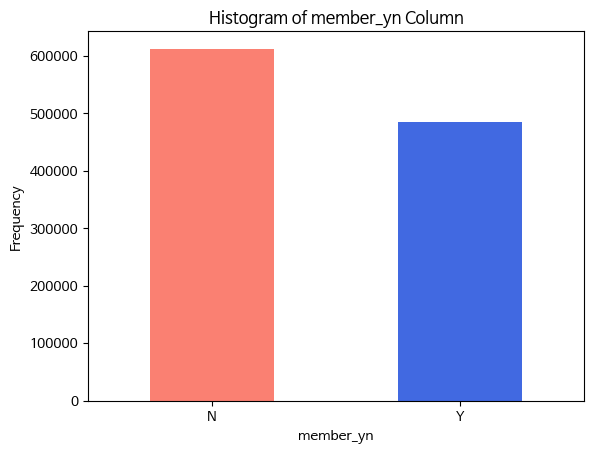

In [19]:
colors = ['salmon', 'royalblue']
print(df['member_yn'].value_counts())
df['member_yn'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('member_yn')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.title('Histogram of member_yn Column')
plt.show()

In [20]:
data = df.copy()

In [21]:
df_discount = data['discount_type'].value_counts().reset_index()
df_discount.columns = ['Discount Type', 'Count']
df_discount

,Discount Type,Count
0,초대권,388826
1,일반,172442
2,기획사판매,137520
3,골드회원 할인10%,52674
4,그린회원 할인5%,27635
...,...,...
705,예술인패스 할인(본인만)10%,4
706,후원회원 할인50%,4
707,싹틔우미 할인,3
708,블루회원 할인20%_,2


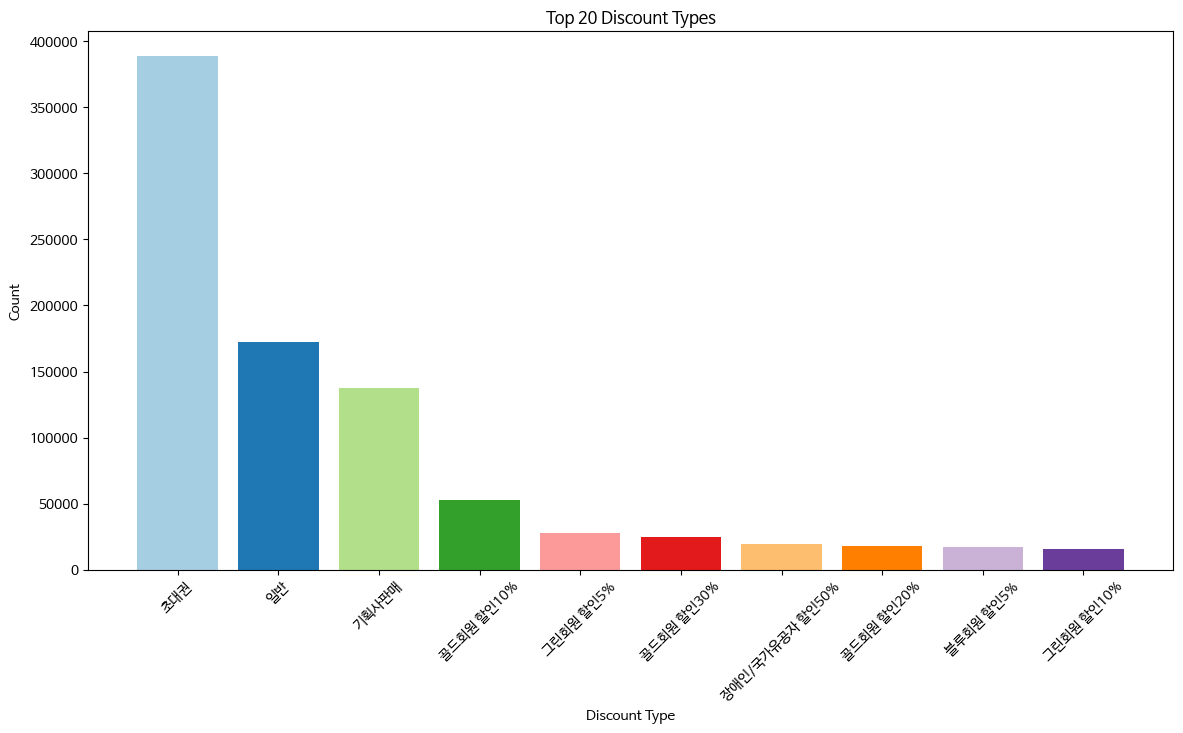

In [22]:
top_20 = df_discount.head(10)

# discount type top20
plt.figure(figsize=(14, 7))
plt.bar(top_20['Discount Type'], top_20['Count'], color=plt.cm.Paired.colors)
plt.xlabel('Discount Type')
plt.ylabel('Count')
plt.title('Top 20 Discount Types')
plt.xticks(rotation=45)
plt.show()


In [23]:
# 초대권을 받은 데이터만 따로 추출
df_invite = df[df['discount_type']=='초대권']
df_invite.isnull().sum()

age                  388824
gender               388824
membership_type_1    388824
membership_type_2    388824
membership_type_3    388824
membership_type_4    388826
membership_type_5    388826
tran_date                 0
tran_time                 0
play_date                 0
play_st_time              0
seat                      0
price                     0
ticket_cancel             0
discount_type             0
performance_code          0
pre_open_date        174748
open_date                 0
genre                  7563
place                     0
running_time              0
intermission              0
member_yn                 0
dtype: int64

In [24]:
df_invite['member_yn'].value_counts()

N    388824
Y         2
Name: member_yn, dtype: int64

In [25]:
# Y 2개는 결측치로 처리
df_invite.drop(df_invite[df_invite['member_yn']=='Y'].index, inplace=True)

<ipython-input-25-a205776bf82d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invite.drop(df_invite[df_invite['member_yn']=='Y'].index, inplace=True)


In [26]:
#member_yn == 'N'으로 표시된 경우 중 잘못 표시된 경우 member_yn 변수 전처리 필요
member_no = df[df['member_yn']=='N']
member_no['membership_type_1'].value_counts()

무료    256
블루     56
골드     38
Name: membership_type_1, dtype: int64

In [27]:
#초대권 아니고 membership 중 하나라도 값이 있는 경우
df_normal_membership_notnull = df[(df['discount_type'] != '초대권') & ((df['membership_type_1'].isnull()==False) | (df['membership_type_2'].isnull()==False) | (df['membership_type_3'].isnull()==False) | (df['membership_type_4'].isnull()==False) | (df['membership_type_5'].isnull()==False))]

#초대권 아니고 membership 값이 아무것도 없는 경우
df_normal_membership_null = df[(df['discount_type'] != '초대권') & ((df['membership_type_1'].isnull()) & (df['membership_type_2'].isnull()) & (df['membership_type_3'].isnull()) & (df['membership_type_4'].isnull()) & (df['membership_type_5'].isnull()))]

In [28]:
# 얘만 전처리해주면 됨
df_normal_membership_notnull['member_yn'].value_counts()

Y    484515
N       350
Name: member_yn, dtype: int64

In [29]:
df_normal_membership_null['member_yn'].value_counts()

N    223277
Name: member_yn, dtype: int64

In [30]:
df_normal_membership_notnull['member_yn'] = 'Y'
df_normal_membership_notnull['member_yn'].value_counts()

<ipython-input-30-af1555e49cee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_membership_notnull['member_yn'] = 'Y'


Y    484865
Name: member_yn, dtype: int64

In [31]:
# 초대권이 아닌 멤버십의 종류에 대한 변수 전처리
newdf = df_normal_membership_notnull[df.columns[2:7]].copy()

for column in ['골드', '블루', '그린', '싹틔우미', '노블', '무료']:
    newdf[column] = 0

for a in df.columns[2:7]:
    for column in ['골드', '블루', '그린', '싹틔우미', '노블', '무료']:
        newdf[column] = newdf.apply(lambda row: 1 if row[a] == column else row[column], axis=1)

newdf

,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,골드,블루,그린,싹틔우미,노블,무료
0,골드,무료,그린,NaN,NaN,1,0,1,0,0,1
4,무료,NaN,NaN,NaN,NaN,0,0,0,0,0,1
5,블루,무료,NaN,NaN,NaN,0,1,0,0,0,1
9,블루,무료,NaN,NaN,NaN,0,1,0,0,0,1
11,무료,NaN,NaN,NaN,NaN,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1920843,골드,무료,NaN,NaN,NaN,1,0,0,0,0,1
1920849,무료,NaN,NaN,NaN,NaN,0,0,0,0,0,1
1920853,무료,그린,NaN,NaN,NaN,0,0,1,0,0,1
1920855,무료,NaN,NaN,NaN,NaN,0,0,0,0,0,1


In [32]:
#각 멤버십 이름으로 변수 넣기
df_member = df_normal_membership_notnull.copy()
df_member[['골드', '블루', '그린', '싹틔우미', '노블', '무료']]=newdf[newdf.columns[5:11]]
df_member = df_member.drop(columns=df.columns[2:7])
df_member

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,place,running_time,intermission,member_yn,골드,블루,그린,싹틔우미,노블,무료
0,50.0,F,20220114,1512,20220204,2000,3층 BOX9 10,10000,2,일반,...,콘서트홀,120,15,Y,1,0,1,0,0,1
4,50.0,M,20220206,1615,20220302,1930,1층 B블록12열 7,180000,0,일반,...,콘서트홀,90,0,Y,0,0,0,0,0,1
5,30.0,F,20181124,1145,20190323,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,...,콘서트홀,100,15,Y,0,1,0,0,0,1
9,NaN,F,20190703,908,20190721,1700,1층 C블록17열 3,75000,0,일반,...,콘서트홀,100,15,Y,0,1,0,0,0,1
11,50.0,F,20191005,1417,20191201,1700,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,...,콘서트홀,120,15,Y,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920843,60.0,F,20181223,1227,20190531,2000,3층 N블록1열 8,10000,0,일반,...,콘서트홀,120,15,Y,1,0,0,0,0,1
1920849,30.0,F,20230516,1743,20230603,1700,3층 D블록6열 6,40000,0,일반,...,콘서트홀,85,15,Y,0,0,0,0,0,1
1920853,60.0,F,20210618,1509,20210704,1500,1층 A블록2열 2,90000,2,일반,...,콘서트홀,110,20,Y,0,0,1,0,0,1
1920855,50.0,M,20230522,1729,20230613,1700,3층 A블록6열 4,10000,0,일반,...,콘서트홀,120,15,Y,0,0,0,0,0,1


In [33]:
df_member = df_member.reset_index(drop=True)

In [34]:
#무료변수는 모든 값이 1.
#무료만 되어있는 회원은 일반회원으로 전처리 진행. (무료만 있으면 1, 아니면 0)

normal = []
for i in range(len(df_member)):
    if (df_member['골드'][i] == 0) & (df_member['블루'][i] == 0) & (df_member['그린'][i] == 0) \
    & (df_member['싹틔우미'][i] == 0) & (df_member['노블'][i] == 0):
        normal.append(1)
    else:
        normal.append(0)

df_member['일반'] = normal
df_member.head()

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,running_time,intermission,member_yn,골드,블루,그린,싹틔우미,노블,무료,일반
0,50.0,F,20220114,1512,20220204,2000,3층 BOX9 10,10000,2,일반,...,120,15,Y,1,0,1,0,0,1,0
1,50.0,M,20220206,1615,20220302,1930,1층 B블록12열 7,180000,0,일반,...,90,0,Y,0,0,0,0,0,1,1
2,30.0,F,20181124,1145,20190323,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,...,100,15,Y,0,1,0,0,0,1,0
3,NaN,F,20190703,908,20190721,1700,1층 C블록17열 3,75000,0,일반,...,100,15,Y,0,1,0,0,0,1,0
4,50.0,F,20191005,1417,20191201,1700,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,...,120,15,Y,0,0,0,0,0,1,1


In [35]:
df_member.drop('무료', axis=1, inplace=True)

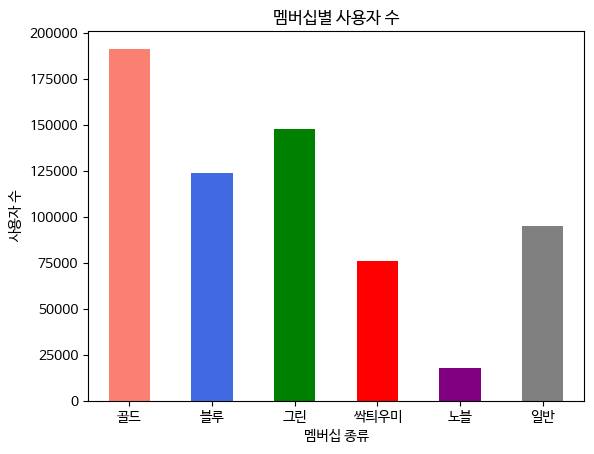

In [36]:
import matplotlib.pyplot as plt

# 각 멤버십 별 사용자 수 계산
membership_counts = df_member[['골드', '블루', '그린', '싹틔우미', '노블', '일반']].sum()

colors = ['salmon', 'royalblue', 'green', 'red', 'purple', 'gray']

# 막대 그래프 그리기
membership_counts.plot(kind='bar', color=colors)
plt.title('멤버십별 사용자 수')
plt.ylabel('사용자 수')
plt.xlabel('멤버십 종류')
plt.xticks(rotation=0)  # x축 레이블의 글씨 방향을 조정
plt.show()

In [37]:
print(len(df_normal_membership_null))
df_normal_membership_null.isnull().sum()

223277


age                  223277
gender               223277
membership_type_1    223277
membership_type_2    223277
membership_type_3    223277
membership_type_4    223277
membership_type_5    223277
tran_date                 0
tran_time                 0
play_date                 0
play_st_time              0
seat                      0
price                     0
ticket_cancel             0
discount_type             0
performance_code          0
pre_open_date         78320
open_date                 0
genre                  6731
place                     0
running_time              0
intermission              0
member_yn                 0
dtype: int64

In [38]:
print(len(df_invite))
df_invite.isnull().sum()

388824


age                  388824
gender               388824
membership_type_1    388824
membership_type_2    388824
membership_type_3    388824
membership_type_4    388824
membership_type_5    388824
tran_date                 0
tran_time                 0
play_date                 0
play_st_time              0
seat                      0
price                     0
ticket_cancel             0
discount_type             0
performance_code          0
pre_open_date        174748
open_date                 0
genre                  7563
place                     0
running_time              0
intermission              0
member_yn                 0
dtype: int64

In [39]:
#gender, age, membership모두 nan이므로 삭제
df_nomember = df_normal_membership_null.drop(columns=df.columns[0:7])
invite = df_invite.drop(columns=df.columns[0:7])

In [40]:
print(df_member.info())
print(df_nomember.info())
print(df_invite.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484865 entries, 0 to 484864
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               484515 non-null  float64
 1   gender            484865 non-null  object 
 2   tran_date         484865 non-null  int64  
 3   tran_time         484865 non-null  int64  
 4   play_date         484865 non-null  int64  
 5   play_st_time      484865 non-null  int64  
 6   seat              484865 non-null  object 
 7   price             484865 non-null  int64  
 8   ticket_cancel     484865 non-null  int64  
 9   discount_type     484865 non-null  object 
 10  performance_code  484865 non-null  int64  
 11  pre_open_date     342288 non-null  float64
 12  open_date         484865 non-null  float64
 13  genre             474086 non-null  object 
 14  place             484865 non-null  object 
 15  running_time      484865 non-null  int64  
 16  intermission      48

(array([2.15938e+05, 5.74300e+03, 1.06800e+03, 2.79000e+02, 9.10000e+01,
        6.80000e+01, 3.70000e+01, 1.70000e+01, 3.50000e+01, 1.00000e+00]),
 array([     0.,  48000.,  96000., 144000., 192000., 240000., 288000.,
        336000., 384000., 432000., 480000.]),
 <BarContainer object of 10 artists>)

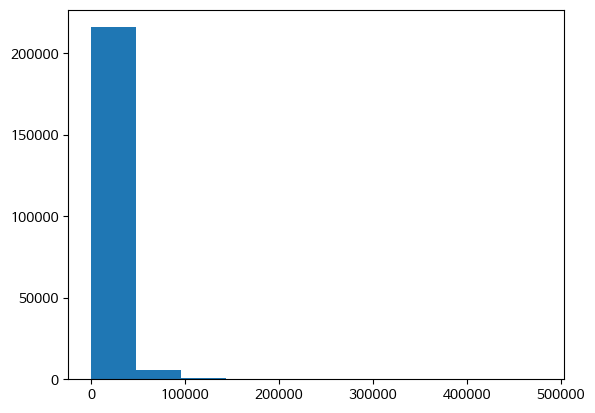

In [41]:
plt.hist(df_nomember['price'])

# **4. 회원 중 나이와 멤버십 정보가 일치하지 않는 경우 전처리**
- 노블회원: 69세 이상 (-> 60대 이상부터)
- 싹틔우미회원: 7~24세 (-> 30대 미만까지)
- 일반회원: 25세 이상 (=무료)
- 골드회원: 연회비 10만원
- 블루회원: 연회비 4만원
- 블루회원: 연회비 2만원

In [42]:
df_member[df_member['age'].isnull()]['gender']

3         F
3185      F
5657      M
9018      F
9430      M
         ..
477528    F
478155    F
479624    M
480648    M
484792    M
Name: gender, Length: 350, dtype: object

In [43]:
# 나이에서의 null값 제거
df_member.drop(df_member[df_member['age'].isnull()].index, inplace=True)

In [44]:
# 7~24세
df_member[df_member['싹틔우미']==1]['age'].value_counts()

20.0    53733
30.0    18631
10.0     3643
50.0       35
40.0       28
80.0        4
60.0        1
Name: age, dtype: int64

In [45]:
#69세 이상
df_member[df_member['노블']==1]['age'].value_counts()

70.0    11024
80.0     6160
40.0      233
50.0       21
30.0       12
60.0        6
20.0        1
Name: age, dtype: int64

In [46]:
df_member[(df_member['싹틔우미']==1) & (df_member['노블']==1)]

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,place,running_time,intermission,member_yn,골드,블루,그린,싹틔우미,노블,일반


In [47]:
# 멤버십 정보와 일치하지 않는 인덱스의 데이터 제거하기
wrong_idx1 = df_member[(df_member['싹틔우미']==1)&(df_member['age']>20)].index
wrong_idx2 = df_member[(df_member['노블']==1)&(df_member['age']<60)].index

new_member = df_member.drop(wrong_idx1)
new_member = new_member.drop(wrong_idx2)
new_member

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,place,running_time,intermission,member_yn,골드,블루,그린,싹틔우미,노블,일반
0,50.0,F,20220114,1512,20220204,2000,3층 BOX9 10,10000,2,일반,...,콘서트홀,120,15,Y,1,0,1,0,0,0
1,50.0,M,20220206,1615,20220302,1930,1층 B블록12열 7,180000,0,일반,...,콘서트홀,90,0,Y,0,0,0,0,0,1
2,30.0,F,20181124,1145,20190323,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,...,콘서트홀,100,15,Y,0,1,0,0,0,0
4,50.0,F,20191005,1417,20191201,1700,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,...,콘서트홀,120,15,Y,0,0,0,0,0,1
5,50.0,M,20221030,1645,20221227,2000,2층 D블록8열 3,120000,2,일반,...,콘서트홀,120,20,Y,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484860,60.0,F,20181223,1227,20190531,2000,3층 N블록1열 8,10000,0,일반,...,콘서트홀,120,15,Y,1,0,0,0,0,0
484861,30.0,F,20230516,1743,20230603,1700,3층 D블록6열 6,40000,0,일반,...,콘서트홀,85,15,Y,0,0,0,0,0,1
484862,60.0,F,20210618,1509,20210704,1500,1층 A블록2열 2,90000,2,일반,...,콘서트홀,110,20,Y,0,0,1,0,0,0
484863,50.0,M,20230522,1729,20230613,1700,3층 A블록6열 4,10000,0,일반,...,콘서트홀,120,15,Y,0,0,0,0,0,1


In [48]:
len(new_member)

465549

In [49]:
df_member = new_member.copy()

In [50]:
df_invite

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,tran_date,tran_time,play_date,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,20191109,...,0,초대권,44,NaN,20191023.0,교향곡,콘서트홀,100,15,N
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,20190723,...,0,초대권,827,20190602.0,20190602.0,교향곡,콘서트홀,120,20,N
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200511,914,20200515,...,0,초대권,2778,20200403.0,20200406.0,교향곡,콘서트홀,120,15,N
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20221112,1256,20221117,...,0,초대권,2260,NaN,20221107.0,교향곡,콘서트홀,95,15,N
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190308,1405,20190322,...,0,초대권,1496,20190303.0,20190303.0,교향곡,콘서트홀,90,20,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191005,1829,20191011,...,0,초대권,2261,NaN,20190921.0,기타,콘서트홀,120,15,N
1920847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191007,1451,20191029,...,0,초대권,2747,20191025.0,20191025.0,교향곡,콘서트홀,100,15,N
1920850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190929,934,20191010,...,0,초대권,2132,20190906.0,20190906.0,클래식,콘서트홀,100,20,N
1920852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190503,1659,20190523,...,0,초대권,2253,20190519.0,20190519.0,클래식,콘서트홀,120,15,N


In [51]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465549 entries, 0 to 484864
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               465549 non-null  float64
 1   gender            465549 non-null  object 
 2   tran_date         465549 non-null  int64  
 3   tran_time         465549 non-null  int64  
 4   play_date         465549 non-null  int64  
 5   play_st_time      465549 non-null  int64  
 6   seat              465549 non-null  object 
 7   price             465549 non-null  int64  
 8   ticket_cancel     465549 non-null  int64  
 9   discount_type     465549 non-null  object 
 10  performance_code  465549 non-null  int64  
 11  pre_open_date     329048 non-null  float64
 12  open_date         465549 non-null  float64
 13  genre             455000 non-null  object 
 14  place             465549 non-null  object 
 15  running_time      465549 non-null  int64  
 16  intermission      46

In [52]:

df_nomember.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223277 entries, 13 to 1920858
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tran_date         223277 non-null  int64  
 1   tran_time         223277 non-null  int64  
 2   play_date         223277 non-null  int64  
 3   play_st_time      223277 non-null  int64  
 4   seat              223277 non-null  object 
 5   price             223277 non-null  int64  
 6   ticket_cancel     223277 non-null  int64  
 7   discount_type     223277 non-null  object 
 8   performance_code  223277 non-null  int64  
 9   pre_open_date     144957 non-null  float64
 10  open_date         223277 non-null  float64
 11  genre             216546 non-null  object 
 12  place             223277 non-null  object 
 13  running_time      223277 non-null  int64  
 14  intermission      223277 non-null  int64  
 15  member_yn         223277 non-null  object 
dtypes: float64(2), int

In [53]:
df_invite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388824 entries, 6 to 1920856
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                0 non-null       float64
 1   gender             0 non-null       object 
 2   membership_type_1  0 non-null       object 
 3   membership_type_2  0 non-null       object 
 4   membership_type_3  0 non-null       object 
 5   membership_type_4  0 non-null       object 
 6   membership_type_5  0 non-null       object 
 7   tran_date          388824 non-null  int64  
 8   tran_time          388824 non-null  int64  
 9   play_date          388824 non-null  int64  
 10  play_st_time       388824 non-null  int64  
 11  seat               388824 non-null  object 
 12  price              388824 non-null  int64  
 13  ticket_cancel      388824 non-null  int64  
 14  discount_type      388824 non-null  object 
 15  performance_code   388824 non-null  int64  
 16  p

# **5. 공연별 티켓 판매율 전처리**

In [54]:
# 'play_date', 'play_st_time', 'performance_code'의 조합을 문자열로 합친 후, 고유한 그룹 번호를 부여
df_member['group_id'] = df_member.groupby(['play_date', 'play_st_time', 'performance_code']).ngroup()

# 변경된 데이터의 처음 몇 줄 확인
df_member[['play_date', 'play_st_time', 'performance_code', 'group_id']].head()

# 'group_id'가 같은 것들의 개수를 계산
group_counts = df_member['group_id'].map(df_member['group_id'].value_counts())

# 계산된 개수를 새로운 열 'group_count'로 추가
df_member['group_count'] = group_counts

# 'group_id'별로 'ticket_cancel'이 2인 행의 개수를 계산
cancel_counts = df_member[df_member['ticket_cancel'] == 2].groupby('group_id').size()

# 'real_counts'를 계산하기 위한 함수 정의
def compute_real_counts(row):
    if row['group_id'] in cancel_counts:
        return row['group_count'] - cancel_counts[row['group_id']]
    else:
        return row['group_count']

df_member['real_counts'] = df_member.apply(compute_real_counts, axis=1)

In [55]:
# 'play_date', 'play_st_time', 'performance_code'의 조합을 문자열로 합친 후, 고유한 그룹 번호를 부여
df_nomember['group_id'] = df_nomember.groupby(['play_date', 'play_st_time', 'performance_code']).ngroup()

# 변경된 데이터의 처음 몇 줄 확인
df_nomember[['play_date', 'play_st_time', 'performance_code', 'group_id']].head()

# 'group_id'가 같은 것들의 개수를 계산
group_counts = df_nomember['group_id'].map(df_nomember['group_id'].value_counts())

# 계산된 개수를 새로운 열 'group_count'로 추가
df_nomember['group_count'] = group_counts

# 'group_id'별로 'ticket_cancel'이 2인 행의 개수를 계산
cancel_counts = df_nomember[df_nomember['ticket_cancel'] == 2].groupby('group_id').size()

# 'real_counts'를 계산하기 위한 함수 정의
def compute_real_counts(row):
    if row['group_id'] in cancel_counts:
        return row['group_count'] - cancel_counts[row['group_id']]
    else:
        return row['group_count']

df_nomember['real_counts'] = df_nomember.apply(compute_real_counts, axis=1)

In [56]:
# 'play_date', 'play_st_time', 'performance_code'의 조합을 문자열로 합친 후, 고유한 그룹 번호를 부여
df_invite['group_id'] = df_invite.groupby(['play_date', 'play_st_time', 'performance_code']).ngroup()

# 변경된 데이터의 처음 몇 줄 확인
df_invite[['play_date', 'play_st_time', 'performance_code', 'group_id']].head()

# 'group_id'가 같은 것들의 개수를 계산
group_counts = df_invite['group_id'].map(df_invite['group_id'].value_counts())

# 계산된 개수를 새로운 열 'group_count'로 추가
df_invite['group_count'] = group_counts

# 'group_id'별로 'ticket_cancel'이 2인 행의 개수를 계산
cancel_counts = df_invite[df_invite['ticket_cancel'] == 2].groupby('group_id').size()

# 'real_counts'를 계산하기 위한 함수 정의
def compute_real_counts(row):
    if row['group_id'] in cancel_counts:
        return row['group_count'] - cancel_counts[row['group_id']]
    else:
        return row['group_count']

df_invite['real_counts'] = df_invite.apply(compute_real_counts, axis=1)

<ipython-input-56-b5831581a4c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invite['group_id'] = df_invite.groupby(['play_date', 'play_st_time', 'performance_code']).ngroup()
<ipython-input-56-b5831581a4c0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invite['group_count'] = group_counts
<ipython-input-56-b5831581a4c0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [57]:
df_member['sales_rate'] = (df_member['real_counts']/2505)*100
df_nomember['sales_rate'] = (df_nomember['real_counts']/2505)*100
df_invite['sales_rate'] = (df_invite['real_counts']/2505)*100

<ipython-input-57-61ed23a08d92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invite['sales_rate'] = (df_invite['real_counts']/2505)*100


# **6. 좌석 전처리**


In [58]:
df_member['seat'][0].split(' ')

['3층', 'BOX9', '10']

In [59]:
df_member['floor'] = df_member['seat'].apply(lambda x: x.split(' ')[0])

In [60]:
df_member['floor'].value_counts()


1층     218248
2층     109556
3층     102926
합창석     34819
Name: floor, dtype: int64

In [61]:
df_member['box'] = df_member['seat'].apply(lambda x: x.split(' ')[1])

In [62]:
df_member['box'].value_counts()


C블록4열     12324
C블록5열     10208
C블록6열      9937
C블록7열      8712
A블록4열      8537
          ...  
A블록21열      976
E블록21열      963
E블록18열      951
E블록20열      947
C블록22열       99
Name: box, Length: 142, dtype: int64

In [63]:
df_member['seat']

0          3층 BOX9 10
1         1층 B블록12열 7
2          1층 A블록2열 1
4           3층 BOX9 5
5          2층 D블록8열 3
             ...     
484860     3층 N블록1열 8
484861     3층 D블록6열 6
484862     1층 A블록2열 2
484863     3층 A블록6열 4
484864     3층 B블록5열 4
Name: seat, Length: 465549, dtype: object

In [64]:
df00=pd.DataFrame()
df00['floor'] = df_member['seat'].apply(lambda x: x.split(' ')[0])
df00['block'] = df_member['seat'].apply(lambda x: x.split(' ')[1].split('블록')[0] if len(x.split('블록')) > 1 else  x.split(' ')[1])
#box에는 열정보가 없어서 임의로 2로 둠
df00['seatcol'] = df_member['seat'].apply(lambda x: x.split(' ')[1].split('블록')[1][:-1] if len(x.split('블록')) > 1 else 0)
df00['seatrow'] = df_member['seat'].apply(lambda x: x.split(' ')[-1])

In [65]:
df00

,floor,block,seatcol,seatrow
0,3층,BOX9,0,10
1,1층,B,12,7
2,1층,A,2,1
4,3층,BOX9,0,5
5,2층,D,8,3
...,...,...,...,...
484860,3층,N,1,8
484861,3층,D,6,6
484862,1층,A,2,2
484863,3층,A,6,4


In [66]:
#2층 box석의 seatrow
seatrow2 = df00[(df00['floor']=='2층') & (df00['block'].str.contains('BOX'))]['seatrow'].apply(lambda x: 1 if int(x) in [1,4,5,8,9] else 2)

In [67]:
#2층 box석의 seatcol
seatcol2=df00[(df00['floor']=='2층') & (df00['block'].str.contains('BOX'))]['seatrow'].apply(lambda x: int(np.ceil(int(x)/2)))

In [68]:
#3층 box석의 seatrow
seatrow3=df00[(df00['floor']=='3층') & (df00['block'].str.contains('BOX'))]['seatrow'].apply(
    lambda x: 1 if int(x) in [1, 6, 7, 12] else (2 if int(x) in [2, 5, 8, 11] else 3)
)


In [69]:
#3층 box석의 seatcol
seatcol3=df00[(df00['floor']=='3층') & (df00['block'].str.contains('BOX'))]['seatrow'].apply(
    lambda x:int(np.ceil(int(x)/3))
)

In [70]:
df00.loc[(df00['floor'] == '2층') & (df00['block'].str.contains('BOX')), 'seatrow'] = seatrow2
df00.loc[(df00['floor'] == '2층') & (df00['block'].str.contains('BOX')), 'seatcol'] = seatcol2
df00.loc[(df00['floor'] == '3층') & (df00['block'].str.contains('BOX')), 'seatrow'] = seatrow3
df00.loc[(df00['floor'] == '3층') & (df00['block'].str.contains('BOX')), 'seatcol'] = seatcol3

In [71]:
df00

,floor,block,seatcol,seatrow
0,3층,BOX9,4,3
1,1층,B,12,7
2,1층,A,2,1
4,3층,BOX9,2,2
5,2층,D,8,3
...,...,...,...,...
484860,3층,N,1,8
484861,3층,D,6,6
484862,1층,A,2,2
484863,3층,A,6,4


In [72]:
df_member[df00.columns]=df00
df_member

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,일반,group_id,group_count,real_counts,sales_rate,floor,box,block,seatcol,seatrow
0,50.0,F,20220114,1512,20220204,2000,3층 BOX9 10,10000,2,일반,...,0,395,1181,685,27.345309,3층,BOX9,BOX9,4,3
1,50.0,M,20220206,1615,20220302,1930,1층 B블록12열 7,180000,0,일반,...,1,407,2312,1288,51.417166,1층,B블록12열,B,12,7
2,30.0,F,20181124,1145,20190323,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,...,0,26,2851,1716,68.502994,1층,A블록2열,A,2,1
4,50.0,F,20191005,1417,20191201,1700,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,...,1,150,417,298,11.896208,3층,BOX9,BOX9,2,2
5,50.0,M,20221030,1645,20221227,2000,2층 D블록8열 3,120000,2,일반,...,0,576,1248,599,23.912176,2층,D블록8열,D,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484860,60.0,F,20181223,1227,20190531,2000,3층 N블록1열 8,10000,0,일반,...,0,55,1143,767,30.618762,3층,N블록1열,N,1,8
484861,30.0,F,20230516,1743,20230603,1700,3층 D블록6열 6,40000,0,일반,...,1,664,1574,917,36.606786,3층,D블록6열,D,6,6
484862,60.0,F,20210618,1509,20210704,1500,1층 A블록2열 2,90000,2,일반,...,0,293,612,374,14.930140,1층,A블록2열,A,2,2
484863,50.0,M,20230522,1729,20230613,1700,3층 A블록6열 4,10000,0,일반,...,1,671,1731,1183,47.225549,3층,A블록6열,A,6,4


In [73]:
df00=pd.DataFrame()
df00['floor'] = df_nomember['seat'].apply(lambda x: x.split(' ')[0])
df00['block'] = df_nomember['seat'].apply(lambda x: x.split(' ')[1].split('블록')[0] if len(x.split('블록')) > 1 else  x.split(' ')[1])
#box에는 열정보가 없어서 임의로 2로 둠
df00['seatcol'] = df_nomember['seat'].apply(lambda x: x.split(' ')[1].split('블록')[1][:-1] if len(x.split('블록')) > 1 else 0)
df00['seatrow'] = df_nomember['seat'].apply(lambda x: x.split(' ')[-1])

In [74]:
df00

,floor,block,seatcol,seatrow
13,3층,BOX12,0,3
19,1층,C,20,4
31,1층,D,18,6
78,1층,C,6,13
84,1층,D,13,3
...,...,...,...,...
1920799,1층,D,5,5
1920827,1층,B,6,11
1920831,2층,B,5,9
1920845,1층,B,21,8


In [75]:
#2층 box석의 seatrow
seatrow2 = df00[(df00['floor']=='2층') & (df00['block'].str.contains('BOX'))]['seatrow'].apply(lambda x: 1 if int(x) in [1,4,5,8,9] else 2)
#2층 box석의 seatcol
seatcol2=df00[(df00['floor']=='2층') & (df00['block'].str.contains('BOX'))]['seatrow'].apply(lambda x: int(np.ceil(int(x)/2)))
#3층 box석의 seatrow
seatrow3=df00[(df00['floor']=='3층') & (df00['block'].str.contains('BOX'))]['seatrow'].apply(
    lambda x: 1 if int(x) in [1, 6, 7, 12] else (2 if int(x) in [2, 5, 8, 11] else 3)
)
#3층 box석의 seatcol
seatcol3=df00[(df00['floor']=='3층') & (df00['block'].str.contains('BOX'))]['seatrow'].apply(
    lambda x:int(np.ceil(int(x)/3))
)

In [76]:
df00.loc[(df00['floor'] == '2층') & (df00['block'].str.contains('BOX')), 'seatrow'] = seatrow2
df00.loc[(df00['floor'] == '2층') & (df00['block'].str.contains('BOX')), 'seatcol'] = seatcol2
df00.loc[(df00['floor'] == '3층') & (df00['block'].str.contains('BOX')), 'seatrow'] = seatrow3
df00.loc[(df00['floor'] == '3층') & (df00['block'].str.contains('BOX')), 'seatcol'] = seatcol3

In [77]:
df_nomember[df00.columns]=df00
df_nomember

,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,...,intermission,member_yn,group_id,group_count,real_counts,sales_rate,floor,block,seatcol,seatrow
13,20220624,1618,20220629,1930,3층 BOX12 3,20000,2,일반,2344,20220430.0,...,15,N,502,101,97,3.872255,3층,BOX12,1,3
19,20190919,1217,20191015,2000,1층 C블록20열 4,0,0,기획사판매,1005,NaN,...,15,N,143,1424,1422,56.766467,1층,C,20,4
31,20190801,1521,20190828,2000,1층 D블록18열 6,0,0,기획사판매,40,20190715.0,...,20,N,114,1714,1507,60.159681,1층,D,18,6
78,20230519,949,20230616,1930,1층 C블록6열 13,0,0,한화초대석,2820,20230505.0,...,15,N,726,1113,902,36.007984,1층,C,6,13
84,20190405,1245,20190518,1700,1층 D블록13열 3,15000,0,단체100인이상50%,1565,20190405.0,...,15,N,49,1374,1365,54.491018,1층,D,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920799,20191201,1726,20200102,2000,1층 D블록5열 5,0,0,기획사판매,2219,NaN,...,15,N,193,1765,1764,70.419162,1층,D,5,5
1920827,20230519,933,20230608,1930,1층 B블록6열 11,0,0,한화초대석,2824,20230505.0,...,15,N,721,1442,1009,40.279441,1층,B,6,11
1920831,20210604,1510,20210609,1930,2층 B블록5열 9,0,0,기획사판매,1307,NaN,...,15,N,309,847,683,27.265469,2층,B,5,9
1920845,20220602,1512,20220705,1930,1층 B블록21열 8,0,0,기획사판매,1862,NaN,...,20,N,505,2152,2095,83.632735,1층,B,21,8


In [78]:
df_member['discount_type'].value_counts()

일반                          149079
골드회원 할인10%                   51396
그린회원 할인5%                    25763
골드회원 할인30%                   24361
장애인/국가유공자 할인50%              17294
                             ...  
가정의달 기념 가족할인(3인이상구매시)30%         3
싹틔우미 할인                          3
예술인패스카드 소지자(본인)20%               2
기획사(특별할인)                        1
골드회원 할인10%_                      1
Name: discount_type, Length: 649, dtype: int64

#**7. 시간 전처리**


In [79]:
!pip install holidays

In [89]:
df_member = df_member.reset_index(drop=True)
df_nomember = df_nomember.reset_index(drop=True)
df_invite = df_invite.reset_index(drop=True)


,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,group_id,group_count,real_counts,sales_rate,floor,box,block,seatcol,seatrow,holiday
0,50.0,F,2022-01-14,1900-01-01 15:12:00,2022-02-04,2000,3층 BOX9 10,10000,2,일반,...,395,1181,685,27.345309,3층,BOX9,BOX9,4,3,0.0
1,50.0,M,2022-02-06,1900-01-01 16:15:00,2022-03-02,1930,1층 B블록12열 7,180000,0,일반,...,407,2312,1288,51.417166,1층,B블록12열,B,12,7,0.0
2,30.0,F,2018-11-24,1900-01-01 11:45:00,2019-03-23,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,...,26,2851,1716,68.502994,1층,A블록2열,A,2,1,0.0
3,50.0,F,2019-10-05,1900-01-01 14:17:00,2019-12-01,1700,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,...,150,417,298,11.896208,3층,BOX9,BOX9,2,2,0.0
4,50.0,M,2022-10-30,1900-01-01 16:45:00,2022-12-27,2000,2층 D블록8열 3,120000,2,일반,...,576,1248,599,23.912176,2층,D블록8열,D,8,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465544,60.0,F,2018-12-23,1900-01-01 12:27:00,2019-05-31,2000,3층 N블록1열 8,10000,0,일반,...,55,1143,767,30.618762,3층,N블록1열,N,1,8,NaN
465545,30.0,F,2023-05-16,1900-01-01 17:43:00,2023-06-03,1700,3층 D블록6열 6,40000,0,일반,...,664,1574,917,36.606786,3층,D블록6열,D,6,6,NaN
465546,60.0,F,2021-06-18,1900-01-01 15:09:00,2021-07-04,1500,1층 A블록2열 2,90000,2,일반,...,293,612,374,14.930140,1층,A블록2열,A,2,2,NaN
465547,50.0,M,2023-05-22,1900-01-01 17:29:00,2023-06-13,1700,3층 A블록6열 4,10000,0,일반,...,671,1731,1183,47.225549,3층,A블록6열,A,6,4,NaN


In [90]:
df_member['play_date']=pd.to_datetime(df_member['play_date'], format='%Y%m%d')
df_nomember['play_date']=pd.to_datetime(df_nomember['play_date'], format='%Y%m%d')
df_invite['play_date']=pd.to_datetime(df_invite['play_date'], format='%Y%m%d')

<ipython-input-90-811debb10d53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invite['play_date']=pd.to_datetime(df_invite['play_date'], format='%Y%m%d')


In [91]:
#공연일자가 휴일인지 판단 후 휴일이면 1, 아니면 0(member)
import holidays
date_list2 = df_member['play_date'].tolist()
kr_holidays2 = holidays.KR()
holiday_df222 = pd.DataFrame(columns=['play_ds','holiday_play'])
holiday_df222['play_ds'] = date_list2
# 휴일이면 1 아니면 0
holiday_df222['holiday_onehot'] = holiday_df222.play_ds.apply(lambda x: 1 if x in kr_holidays2 else 0)
df_member['holiday'] = holiday_df222['holiday_onehot']

In [92]:
#공연일자가 휴일인지 판단 후 휴일이면 1, 아니면 0(nomember)
import holidays
date_list2 = df_nomember['play_date'].tolist()
kr_holidays2 = holidays.KR()
holiday_df222 = pd.DataFrame(columns=['play_ds','holiday_play'])
holiday_df222['play_ds'] = date_list2
# 휴일이면 1 아니면 0
holiday_df222['holiday_onehot'] = holiday_df222.play_ds.apply(lambda x: 1 if x in kr_holidays2 else 0)
df_nomember['holiday'] = holiday_df222['holiday_onehot']

In [93]:
#공연일자가 휴일인지 판단
import holidays
date_list2 = df_invite['play_date'].tolist()
kr_holidays2 = holidays.KR()
holiday_df222 = pd.DataFrame(columns=['play_ds','holiday_play'])
holiday_df222['play_ds'] = date_list2
# 휴일이면 1 아니면 0
holiday_df222['holiday_onehot'] = holiday_df222.play_ds.apply(lambda x: 1 if x in kr_holidays2 else 0)
df_invite['holiday'] = holiday_df222['holiday_onehot']

<ipython-input-93-9f594e5ae9b5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invite['holiday'] = holiday_df222['holiday_onehot']


In [94]:
#pre_open_date의 NULL값들을 open_date값들로 채워주기
df_member['pre_open_date'].fillna(df_member['open_date'], inplace=True)
df_nomember['pre_open_date'].fillna(df_nomember['open_date'], inplace=True)
df_invite['pre_open_date'].fillna(df_invite['open_date'], inplace=True)
# 조건에 따라 값 교환->선예매 시작일이 예매시작일보다 느릴떄 서로 값을 바꿔줌
mask = df_member['pre_open_date'] > df_member['open_date']
df_member.loc[mask, ['pre_open_date', 'open_date']] = df_member.loc[mask, ['open_date', 'pre_open_date']].values

mask = df_nomember['pre_open_date'] > df_nomember['open_date']
df_nomember.loc[mask, ['pre_open_date', 'open_date']] = df_nomember.loc[mask, ['open_date', 'pre_open_date']].values

mask = df_invite['pre_open_date'] > df_invite['open_date']
df_invite.loc[mask, ['pre_open_date', 'open_date']] = df_invite.loc[mask, ['open_date', 'pre_open_date']].values

<ipython-input-94-8fc8d0a4c3fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invite['pre_open_date'].fillna(df_invite['open_date'], inplace=True)


In [95]:
df_member['holiday'].isnull().sum()

0

In [96]:
df_member['tran_date']=pd.to_datetime(df_member['tran_date'], format='%Y%m%d')
df_member

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,group_id,group_count,real_counts,sales_rate,floor,box,block,seatcol,seatrow,holiday
0,50.0,F,2022-01-14,1900-01-01 15:12:00,2022-02-04,2000,3층 BOX9 10,10000,2,일반,...,395,1181,685,27.345309,3층,BOX9,BOX9,4,3,0
1,50.0,M,2022-02-06,1900-01-01 16:15:00,2022-03-02,1930,1층 B블록12열 7,180000,0,일반,...,407,2312,1288,51.417166,1층,B블록12열,B,12,7,0
2,30.0,F,2018-11-24,1900-01-01 11:45:00,2019-03-23,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,...,26,2851,1716,68.502994,1층,A블록2열,A,2,1,0
3,50.0,F,2019-10-05,1900-01-01 14:17:00,2019-12-01,1700,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,...,150,417,298,11.896208,3층,BOX9,BOX9,2,2,0
4,50.0,M,2022-10-30,1900-01-01 16:45:00,2022-12-27,2000,2층 D블록8열 3,120000,2,일반,...,576,1248,599,23.912176,2층,D블록8열,D,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465544,60.0,F,2018-12-23,1900-01-01 12:27:00,2019-05-31,2000,3층 N블록1열 8,10000,0,일반,...,55,1143,767,30.618762,3층,N블록1열,N,1,8,0
465545,30.0,F,2023-05-16,1900-01-01 17:43:00,2023-06-03,1700,3층 D블록6열 6,40000,0,일반,...,664,1574,917,36.606786,3층,D블록6열,D,6,6,0
465546,60.0,F,2021-06-18,1900-01-01 15:09:00,2021-07-04,1500,1층 A블록2열 2,90000,2,일반,...,293,612,374,14.930140,1층,A블록2열,A,2,2,0
465547,50.0,M,2023-05-22,1900-01-01 17:29:00,2023-06-13,1700,3층 A블록6열 4,10000,0,일반,...,671,1731,1183,47.225549,3층,A블록6열,A,6,4,0


In [86]:
df_member['tran_time'] = df_member['tran_time'].apply(lambda x: str(x).zfill(4))

# 'tran_date' 열을 'HHMM' 형식의 datetime 객체로 변환
df_member['tran_time'] = pd.to_datetime(df_member['tran_time'], format='%H%M')

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,group_id,group_count,real_counts,sales_rate,floor,box,block,seatcol,seatrow,holiday
0,50.0,F,2022-01-14,1900-01-01 15:12:00,2022-02-04,2000,3층 BOX9 10,10000,2,일반,...,395,1181,685,27.345309,3층,BOX9,BOX9,4,3,0.0
1,50.0,M,2022-02-06,1900-01-01 16:15:00,2022-03-02,1930,1층 B블록12열 7,180000,0,일반,...,407,2312,1288,51.417166,1층,B블록12열,B,12,7,0.0
2,30.0,F,2018-11-24,1900-01-01 11:45:00,2019-03-23,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,...,26,2851,1716,68.502994,1층,A블록2열,A,2,1,0.0
4,50.0,F,2019-10-05,1900-01-01 14:17:00,2019-12-01,1700,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,...,150,417,298,11.896208,3층,BOX9,BOX9,2,2,0.0
5,50.0,M,2022-10-30,1900-01-01 16:45:00,2022-12-27,2000,2층 D블록8열 3,120000,2,일반,...,576,1248,599,23.912176,2층,D블록8열,D,8,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484860,60.0,F,2018-12-23,1900-01-01 12:27:00,2019-05-31,2000,3층 N블록1열 8,10000,0,일반,...,55,1143,767,30.618762,3층,N블록1열,N,1,8,NaN
484861,30.0,F,2023-05-16,1900-01-01 17:43:00,2023-06-03,1700,3층 D블록6열 6,40000,0,일반,...,664,1574,917,36.606786,3층,D블록6열,D,6,6,NaN
484862,60.0,F,2021-06-18,1900-01-01 15:09:00,2021-07-04,1500,1층 A블록2열 2,90000,2,일반,...,293,612,374,14.930140,1층,A블록2열,A,2,2,NaN
484863,50.0,M,2023-05-22,1900-01-01 17:29:00,2023-06-13,1700,3층 A블록6열 4,10000,0,일반,...,671,1731,1183,47.225549,3층,A블록6열,A,6,4,NaN


In [ ]:
df_member['tran_time'] = df_member['tran_time'].apply(lambda x: x.time())
df_member

In [ ]:
df_member['play_date']=pd.to_datetime(df_member['play_date'], format='%Y%m%d')

In [ ]:
df_member['play_st_time'] = df_member['play_st_time'].apply(lambda x: str(x).zfill(4))

# 'tran_date' 열을 'HHMM' 형식의 datetime 객체로 변환
df_member['play_st_time'] = pd.to_datetime(df_member['play_st_time'], format='%H%M')
df_member['play_st_time'] = df_member['play_st_time'].apply(lambda x: x.time())
df_member

In [ ]:
df_member['pre_open_date']=pd.to_datetime(df_member['pre_open_date'], format='%Y%m%d')
df_member['open_date']=pd.to_datetime(df_member['open_date'], format='%Y%m%d')
df_member

In [ ]:
df_member['pre_open_date']=pd.to_datetime(df_member['pre_open_date'], format='%Y%m%d')
df_member['open_date']=pd.to_datetime(df_member['open_date'], format='%Y%m%d')
df_member['pre_open_date']

In [ ]:
df_member['pre_open_date'] = df_member['pre_open_date'].fillna(df_member['open_date'])

In [ ]:
df_nomember['tran_date']=pd.to_datetime(df_nomember['tran_date'], format='%Y%m%d')
df_nomember['tran_time'] = df_nomember['tran_time'].apply(lambda x: str(x).zfill(4))

# 'tran_date' 열을 'HHMM' 형식의 datetime 객체로 변환
df_nomember['tran_time'] = pd.to_datetime(df_nomember['tran_time'], format='%H%M')
df_nomember['tran_time'] = df_nomember['tran_time'].apply(lambda x: x.time())

df_nomember['play_date']=pd.to_datetime(df_nomember['play_date'], format='%Y%m%d')

df_nomember['play_st_time'] = df_nomember['play_st_time'].apply(lambda x: str(x).zfill(4))

# 'tran_date' 열을 'HHMM' 형식의 datetime 객체로 변환
df_nomember['play_st_time'] = pd.to_datetime(df_nomember['play_st_time'], format='%H%M')
df_nomember['play_st_time'] = df_nomember['play_st_time'].apply(lambda x: x.time())

df_nomember['pre_open_date']=pd.to_datetime(df_nomember['pre_open_date'], format='%Y%m%d')
df_nomember['open_date']=pd.to_datetime(df_nomember['open_date'], format='%Y%m%d')

df_nomember['pre_open_date'] = df_nomember['pre_open_date'].fillna(df_nomember['open_date'])
df_nomember

In [ ]:
#!pip install holidays

In [ ]:
# #공연일자가 휴일인지 판단 후 휴일이면 1, 아니면 0(member)
# import holidays
# date_list2 = df_member['play_date'].tolist()
# kr_holidays2 = holidays.KR()
# holiday_df222 = pd.DataFrame(columns=['play_ds','holiday_play'])
# holiday_df222['play_ds'] = date_list2
# # 휴일이면 1 아니면 0
# holiday_df222['holiday_onehot'] = holiday_df222.play_ds.apply(lambda x: 1 if x in kr_holidays2 else 0)
# df_member['holiday'] = holiday_df222['holiday_onehot']

In [ ]:
# #공연일자가 휴일인지 판단 후 휴일이면 1, 아니면 0(nomember)
# import holidays
# date_list2 = df_nomember['play_date'].tolist()
# kr_holidays2 = holidays.KR()
# holiday_df222 = pd.DataFrame(columns=['play_ds','holiday_play'])
# holiday_df222['play_ds'] = date_list2
# # 휴일이면 1 아니면 0
# holiday_df222['holiday_onehot'] = holiday_df222.play_ds.apply(lambda x: 1 if x in kr_holidays2 else 0)
# df_nomember['holiday'] = holiday_df222['holiday_onehot']

In [ ]:
#weekday 추가 (요일)
df_member['play_date'] = pd.to_datetime(df_member['play_date'])
df_member['weekday'] = df_member['play_date'].dt.weekday

In [ ]:
#weekday 추가 (요일)
df_nomember['play_date'] = pd.to_datetime(df_nomember['play_date'])
df_nomember['weekday'] = df_nomember['play_date'].dt.weekday

In [ ]:
df_member['holiday'].value_counts()

In [ ]:
df_member

In [ ]:
#공연일자와 예매 거래일자 차이(day)
df_member['play-tran']=(df_member['play_date']-df_member['tran_date']).astype(str).apply(lambda x: x.split('day')[0])
df_nomember['play-tran']=(df_nomember['play_date']-df_nomember['tran_date']).astype(str).apply(lambda x: x.split('day')[0])

In [ ]:
#공연 일자와 선예매 시작일 차이
df_member['play-pre_open']=(df_member['play_date']-df_member['pre_open_date']).astype(str).apply(lambda x: x.split('day')[0])
df_nomember['play-pre_open']=(df_nomember['play_date']-df_nomember['pre_open_date']).astype(str).apply(lambda x: x.split('day')[0])

In [ ]:
#공연 일자와 예매 시작일 차이
df_member['play-open']=(df_member['play_date']-df_member['open_date']).astype(str).apply(lambda x: x.split('day')[0])
df_nomember['play-open']=(df_nomember['play_date']-df_nomember['open_date']).astype(str).apply(lambda x: x.split('day')[0])

In [ ]:
#선예매 시작일과 예매 거래일의 차이
df_member['pre_open-tran']=(df_member['tran_date']-df_member['pre_open_date']).astype(str).apply(lambda x: x.split('day')[0])
df_nomember['pre_open-tran']=(df_nomember['tran_date']-df_nomember['pre_open_date']).astype(str).apply(lambda x: x.split('day')[0])

In [ ]:
#예매 시작일과 예매 거래일의 차이
df_member['open-tran']=(df_member['tran_date']-df_member['open_date']).astype(str).apply(lambda x: x.split('day')[0])
df_nomember['open-tran']=(df_nomember['tran_date']-df_nomember['open_date']).astype(str).apply(lambda x: x.split('day')[0])

In [ ]:
#선예매 시작일과 예매 시작일의 차이
df_member['pre_open-tran']=(df_member['open_date']-df_member['pre_open_date']).astype(str).apply(lambda x: x.split('day')[0])
df_nomember['pre_open-tran']=(df_nomember['open_date']-df_nomember['pre_open_date']).astype(str).apply(lambda x: x.split('day')[0])

In [ ]:
df_member

In [107]:
from datetime import datetime

In [108]:
from datetime import datetime, time

def round_nearest_hour(time_str):
    # datetime.time 객체를 문자열로 변환
    time_str = time_str.strftime("%H%M")

    # HHMM 형식의 문자열을 datetime 객체로 변환
    time_obj = datetime.strptime(time_str, "%H%M")

    # 분을 가져옴
    minute = time_obj.minute

    # 분이 30분 이상이면 시간을 1 증가시킴
    if minute >= 30 and time_obj.hour!=23:
        time_obj = time_obj.replace(hour=time_obj.hour + 1, minute=0)
    elif minute >= 30 and time_obj.hour==23:
        time_obj = time_obj.replace(hour=00, minute=0)
    else:
        time_obj = time_obj.replace(minute=0)

    # 시간을 문자열로 변환하여 반환
    return time_obj.strftime("%H")

In [109]:
#예매 시간을 가장 가까운 시간으로 변환
df_member['tran_onlytime']=df_member['tran_time'].apply(lambda x:round_nearest_hour(x))

In [110]:
df_nomember['tran_onlytime']=df_nomember['tran_time'].apply(lambda x:round_nearest_hour(x))

In [111]:
#공연 시작 시간을 가장 가까운 시간으로 변환
df_member['play_onlytime']=df_member['play_st_time'].apply(lambda x:round_nearest_hour(x))
df_nomember['play_onlytime']=df_nomember['play_st_time'].apply(lambda x:round_nearest_hour(x))

In [112]:
df_invite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388824 entries, 6 to 1920856
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                0 non-null       float64
 1   gender             0 non-null       object 
 2   membership_type_1  0 non-null       object 
 3   membership_type_2  0 non-null       object 
 4   membership_type_3  0 non-null       object 
 5   membership_type_4  0 non-null       object 
 6   membership_type_5  0 non-null       object 
 7   tran_date          388824 non-null  int64  
 8   tran_time          388824 non-null  int64  
 9   play_date          388824 non-null  int64  
 10  play_st_time       388824 non-null  int64  
 11  seat               388824 non-null  object 
 12  price              388824 non-null  int64  
 13  ticket_cancel      388824 non-null  int64  
 14  discount_type      388824 non-null  object 
 15  performance_code   388824 non-null  int64  
 16  p

In [113]:
df_invite

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,tran_date,tran_time,play_date,...,genre,place,running_time,intermission,member_yn,group_id,group_count,real_counts,sales_rate,holiday
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,20191109,...,교향곡,콘서트홀,100,15,N,137,2490,2489,99.361277,0.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,20190723,...,교향곡,콘서트홀,120,20,N,88,1311,1310,52.295409,0.0
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200511,914,20200515,...,교향곡,콘서트홀,120,15,N,183,1355,1354,54.051896,0.0
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20221112,1256,20221117,...,교향곡,콘서트홀,95,15,N,460,1730,1729,69.021956,0.0
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190308,1405,20190322,...,교향곡,콘서트홀,90,20,N,29,2469,2465,98.403194,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191005,1829,20191011,...,기타,콘서트홀,120,15,N,123,2729,2199,87.784431,NaN
1920847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191007,1451,20191029,...,교향곡,콘서트홀,100,15,N,132,2366,2363,94.331337,NaN
1920850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190929,934,20191010,...,클래식,콘서트홀,100,20,N,122,1906,1905,76.047904,NaN
1920852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190503,1659,20190523,...,클래식,콘서트홀,120,15,N,48,2475,2465,98.403194,NaN


*invite에 대해서도 같은 좌석 전처리, 시간 전처리 적용*

In [114]:
df00=pd.DataFrame()
df00['floor'] = df_invite['seat'].apply(lambda x: x.split(' ')[0])
df00['block'] = df_invite['seat'].apply(lambda x: x.split(' ')[1].split('블록')[0] if len(x.split('블록')) > 1 else  x.split(' ')[1])
#box에는 열정보가 없어서 임의로 2로 둠
df00['seatcol'] = df_invite['seat'].apply(lambda x: x.split(' ')[1].split('블록')[1][:-1] if len(x.split('블록')) > 1 else 0)
df00['seatrow'] = df_invite['seat'].apply(lambda x: x.split(' ')[-1])


#2층 box석의 seatrow
seatrow2 = df00[(df00['floor']=='2층') & (df00['block'].str.contains('BOX'))]['seatrow'].apply(lambda x: 1 if int(x) in [1,4,5,8,9] else 2)
#2층 box석의 seatcol
seatcol2=df00[(df00['floor']=='2층') & (df00['block'].str.contains('BOX'))]['seatrow'].apply(lambda x: int(np.ceil(int(x)/2)))
#3층 box석의 seatrow
seatrow3=df00[(df00['floor']=='3층') & (df00['block'].str.contains('BOX'))]['seatrow'].apply(
    lambda x: 1 if int(x) in [1, 6, 7, 12] else (2 if int(x) in [2, 5, 8, 11] else 3)
)
#3층 box석의 seatcol
seatcol3=df00[(df00['floor']=='3층') & (df00['block'].str.contains('BOX'))]['seatrow'].apply(
    lambda x:int(np.ceil(int(x)/3))
)

df00.loc[(df00['floor'] == '2층') & (df00['block'].str.contains('BOX')), 'seatrow'] = seatrow2
df00.loc[(df00['floor'] == '2층') & (df00['block'].str.contains('BOX')), 'seatcol'] = seatcol2
df00.loc[(df00['floor'] == '3층') & (df00['block'].str.contains('BOX')), 'seatrow'] = seatrow3
df00.loc[(df00['floor'] == '3층') & (df00['block'].str.contains('BOX')), 'seatcol'] = seatcol3

df_invite[df00.columns]=df00
df_invite

df_invite['tran_date']=pd.to_datetime(df_invite['tran_date'], format='%Y%m%d')
df_invite['tran_time'] = df_invite['tran_time'].apply(lambda x: str(x).zfill(4))

# 'tran_date' 열을 'HHMM' 형식의 datetime 객체로 변환
df_invite['tran_time'] = pd.to_datetime(df_invite['tran_time'], format='%H%M')
df_invite['tran_time'] = df_invite['tran_time'].apply(lambda x: x.time())

df_invite['play_date']=pd.to_datetime(df_invite['play_date'], format='%Y%m%d')

df_invite['play_st_time'] = df_invite['play_st_time'].apply(lambda x: str(x).zfill(4))

# 'tran_date' 열을 'HHMM' 형식의 datetime 객체로 변환
df_invite['play_st_time'] = pd.to_datetime(df_invite['play_st_time'], format='%H%M')
df_invite['play_st_time'] = df_invite['play_st_time'].apply(lambda x: x.time())

df_invite['pre_open_date']=pd.to_datetime(df_invite['pre_open_date'], format='%Y%m%d')
df_invite['open_date']=pd.to_datetime(df_invite['open_date'], format='%Y%m%d')
df_invite['tran_onlytime']=df_invite['tran_time'].apply(lambda x:round_nearest_hour(x))
df_invite['play_onlytime']=df_invite['play_st_time'].apply(lambda x:round_nearest_hour(x))

# #공연일자가 휴일인지 판단
# import holidays
# date_list2 = df_invite['play_date'].tolist()
# kr_holidays2 = holidays.KR()
# holiday_df222 = pd.DataFrame(columns=['play_ds','holiday_play'])
# holiday_df222['play_ds'] = date_list2
# # 휴일이면 1 아니면 0
# holiday_df222['holiday_onehot'] = holiday_df222.play_ds.apply(lambda x: 1 if x in kr_holidays2 else 0)
# df_invite['holiday'] = holiday_df222['holiday_onehot']

#weekday 추가 (요일)
df_invite['play_date'] = pd.to_datetime(df_invite['play_date'])
df_invite['weekday'] = df_invite['play_date'].dt.weekday

df_invite['play-tran']=(df_invite['play_date']-df_invite['tran_date']).astype(str).apply(lambda x: x.split('day')[0])
df_invite['play-pre_open']=(df_invite['play_date']-df_invite['pre_open_date']).astype(str).apply(lambda x: x.split('day')[0])
df_invite['play-open']=(df_invite['play_date']-df_invite['open_date']).astype(str).apply(lambda x: x.split('day')[0])
df_invite['pre_open-tran']=(df_invite['tran_date']-df_invite['pre_open_date']).astype(str).apply(lambda x: x.split('day')[0])
df_invite['open-tran']=(df_invite['tran_date']-df_invite['open_date']).astype(str).apply(lambda x: x.split('day')[0])
df_invite['pre_open-tran']=(df_invite['open_date']-df_invite['pre_open_date']).astype(str).apply(lambda x: x.split('day')[0])

<ipython-input-114-cf0fdd796f09>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invite[df00.columns]=df00
<ipython-input-114-cf0fdd796f09>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invite[df00.columns]=df00
<ipython-input-114-cf0fdd796f09>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [115]:
mask = df_member['pre_open_date'] > df_member['open_date']
mask.value_counts()

False    465549
dtype: int64

In [116]:
#공연날짜를 이용해 년, 월의 새로운 열을 만듦
df_member['play_date'] = pd.to_datetime(df_member['play_date'])
df_member['year'] = df_member['play_date'].dt.year
df_member['month'] = df_member['play_date'].dt.month
df_member
#공연날짜를 이용해 년, 월의 새로운 열을 만듦
df_nomember['play_date'] = pd.to_datetime(df_nomember['play_date'])
df_nomember['year'] = df_nomember['play_date'].dt.year
df_nomember['month'] = df_nomember['play_date'].dt.month
df_nomember
#공연날짜를 이용해 년, 월의 새로운 열을 만듦
df_invite['play_date'] = pd.to_datetime(df_invite['play_date'])
df_invite['year'] = df_invite['play_date'].dt.year
df_invite['month'] = df_invite['play_date'].dt.month
df_invite

<ipython-input-116-b4a8fcd7131a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invite['play_date'] = pd.to_datetime(df_invite['play_date'])
<ipython-input-116-b4a8fcd7131a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invite['year'] = df_invite['play_date'].dt.year
<ipython-input-116-b4a8fcd7131a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,tran_date,tran_time,play_date,...,tran_onlytime,play_onlytime,weekday,play-tran,play-pre_open,play-open,pre_open-tran,open-tran,year,month
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-20,14:59:00,2019-11-09,...,15,17,5,20,17,17,0,-3,2019,11
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-13,09:54:00,2019-07-23,...,10,20,1,40,51,51,0,11,2019,7
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-11,09:14:00,2020-05-15,...,09,20,4,4,42,39,3,35,2020,5
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-12,12:56:00,2022-11-17,...,13,20,3,5,10,10,0,5,2022,11
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-08,14:05:00,2019-03-22,...,14,20,4,14,19,19,0,5,2019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-05,18:29:00,2019-10-11,...,18,20,4,6,20,20,0,14,2019,10
1920847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-07,14:51:00,2019-10-29,...,15,20,1,22,4,4,0,-18,2019,10
1920850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-29,09:34:00,2019-10-10,...,10,20,3,11,34,34,0,23,2019,10
1920852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03,16:59:00,2019-05-23,...,17,20,3,20,4,4,0,-16,2019,5


In [117]:
mask = df_member['pre_open_date'] > df_member['open_date']
mask.value_counts()

False    465549
dtype: int64

In [118]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465549 entries, 0 to 484864
Data columns (total 44 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   age               465549 non-null  float64       
 1   gender            465549 non-null  object        
 2   tran_date         465549 non-null  datetime64[ns]
 3   tran_time         465549 non-null  object        
 4   play_date         465549 non-null  datetime64[ns]
 5   play_st_time      465549 non-null  object        
 6   seat              465549 non-null  object        
 7   price             465549 non-null  int64         
 8   ticket_cancel     465549 non-null  int64         
 9   discount_type     465549 non-null  object        
 10  performance_code  465549 non-null  int64         
 11  pre_open_date     465549 non-null  datetime64[ns]
 12  open_date         465549 non-null  datetime64[ns]
 13  genre             455000 non-null  object        
 14  plac

In [119]:
df_member

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,weekday,play-tran,play-pre_open,play-open,pre_open-tran,open-tran,tran_onlytime,play_onlytime,year,month
0,50.0,F,2022-01-14,15:12:00,2022-02-04,20:00:00,3층 BOX9 10,10000,2,일반,...,4,21,21,20,1,-1,15,20,2022,2
1,50.0,M,2022-02-06,16:15:00,2022-03-02,19:30:00,1층 B블록12열 7,180000,0,일반,...,2,24,52,51,1,27,16,20,2022,3
2,30.0,F,2018-11-24,11:45:00,2019-03-23,20:00:00,1층 A블록2열 1,144000,2,블루회원 할인20%,...,5,119,124,124,0,5,12,20,2019,3
4,50.0,F,2019-10-05,14:17:00,2019-12-01,17:00:00,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,...,6,57,57,57,0,0,14,17,2019,12
5,50.0,M,2022-10-30,16:45:00,2022-12-27,20:00:00,2층 D블록8열 3,120000,2,일반,...,1,58,58,52,6,-6,17,20,2022,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484860,60.0,F,2018-12-23,12:27:00,2019-05-31,20:00:00,3층 N블록1열 8,10000,0,일반,...,4,159,180,180,0,21,12,20,2019,5
484861,30.0,F,2023-05-16,17:43:00,2023-06-03,17:00:00,3층 D블록6열 6,40000,0,일반,...,5,18,78,77,1,59,18,17,2023,6
484862,60.0,F,2021-06-18,15:09:00,2021-07-04,15:00:00,1층 A블록2열 2,90000,2,일반,...,6,16,16,14,2,-2,15,15,2021,7
484863,50.0,M,2023-05-22,17:29:00,2023-06-13,17:00:00,3층 A블록6열 4,10000,0,일반,...,1,22,39,37,2,15,17,17,2023,6


In [120]:
df_member['holiday'].info()

<class 'pandas.core.series.Series'>
Int64Index: 465549 entries, 0 to 484864
Series name: holiday
Non-Null Count   Dtype  
--------------   -----  
446979 non-null  float64
dtypes: float64(1)
memory usage: 23.2 MB


In [ ]:
df_invite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388824 entries, 6 to 1920856
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   age                0 non-null       float64       
 1   gender             0 non-null       object        
 2   membership_type_1  0 non-null       object        
 3   membership_type_2  0 non-null       object        
 4   membership_type_3  0 non-null       object        
 5   membership_type_4  0 non-null       object        
 6   membership_type_5  0 non-null       object        
 7   tran_date          388824 non-null  datetime64[ns]
 8   tran_time          388824 non-null  object        
 9   play_date          388824 non-null  datetime64[ns]
 10  play_st_time       388824 non-null  object        
 11  seat               388824 non-null  object        
 12  price              388824 non-null  int64         
 13  ticket_cancel      388824 non-null  int64  

In [ ]:
df_member[['age','seatcol','seatrow','tran_onlytime','play_onlytime','play-tran','play-open','open-tran']]=df_member[['age','seatcol','seatrow','tran_onlytime','play_onlytime','play-tran','play-open','open-tran']].fillna(0).astype(int)

In [ ]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465549 entries, 0 to 484864
Data columns (total 44 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   age               465549 non-null  int64         
 1   gender            465549 non-null  object        
 2   tran_date         465549 non-null  datetime64[ns]
 3   tran_time         465549 non-null  object        
 4   play_date         465549 non-null  datetime64[ns]
 5   play_st_time      465549 non-null  object        
 6   seat              465549 non-null  object        
 7   price             465549 non-null  int64         
 8   ticket_cancel     465549 non-null  int64         
 9   discount_type     465549 non-null  object        
 10  performance_code  465549 non-null  int64         
 11  pre_open_date     465549 non-null  datetime64[ns]
 12  open_date         465549 non-null  datetime64[ns]
 13  genre             455000 non-null  object        
 14  plac

In [ ]:
df_nomember[['seatcol','seatrow','tran_onlytime','play_onlytime','play-tran','play-open','open-tran']]=df_nomember[['seatcol','seatrow','tran_onlytime','play_onlytime','play-tran','play-open','open-tran']].fillna(0).astype(int)

In [ ]:
df_invite[['age','seatcol','seatrow','tran_onlytime','play_onlytime','play-tran','play-open','open-tran']]=df_invite[['age','seatcol','seatrow','tran_onlytime','play_onlytime','play-tran','play-open','open-tran']].fillna(0).astype(int)

# **8. 대관여부 외부변수 전처리**

In [ ]:
df_2023 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023_빅콘테스트/2023.csv')
df_2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023_빅콘테스트/2022.csv')
df_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023_빅콘테스트/2021.csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023_빅콘테스트/2020.csv')
df_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023_빅콘테스트/2019.csv')
df_2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023_빅콘테스트/2018.csv')

In [ ]:
df_2023 = df_2023[df_2023['공간명'] == '예술의전당 콘서트홀']
df_2022 = df_2022[df_2022['공간명'] == '예술의전당 콘서트홀']
df_2021 = df_2021[df_2021['공간명'] == '예술의전당 콘서트홀']
df_2020 = df_2020[df_2020['공간명'] == '예술의전당 콘서트홀']
df_2019 = df_2019[df_2019['공간명'] == '예술의전당 콘서트홀']
df_2018 = df_2018[df_2018['공간명'] == '예술의전당 콘서트홀']

In [ ]:
df_2018.rename(columns={'일자': 'play_date'}, inplace=True)
df_2019.rename(columns={'일자': 'play_date'}, inplace=True)
df_2020.rename(columns={'일자': 'play_date'}, inplace=True)
df_2021.rename(columns={'일자': 'play_date'}, inplace=True)
df_2022.rename(columns={'일자': 'play_date'}, inplace=True)
df_2023.rename(columns={'일자': 'play_date'}, inplace=True)
df_2018.rename(columns={'시간': 'play_st_time'}, inplace=True)
df_2019.rename(columns={'시간': 'play_st_time'}, inplace=True)
df_2020.rename(columns={'시간': 'play_st_time'}, inplace=True)
df_2021.rename(columns={'시간': 'play_st_time'}, inplace=True)
df_2022.rename(columns={'시간': 'play_st_time'}, inplace=True)
df_2023.rename(columns={'시간': 'play_st_time'}, inplace=True)

In [ ]:
combine = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)
combine.head()

,작품명,공간명,구분,대관사,play_date,play_st_time,유료,무료,합계,수기유료,수기무료
0,(사)뉴서울필하모닉 창단27주년 기념 정기연주회,예술의전당 콘서트홀,대관,(사)뉴서울필하모닉오케스트라,20180710,2000,23,1100,1123,NaN,NaN
1,(사)서울오케스트라 이음콘서트,예술의전당 콘서트홀,대관,사단법인 서울오케스트라,20180809,2000,914,75,989,NaN,NaN
2,100년전통 잘츠부르그 오케스트라 솔리스텐 신춘음악회,예술의전당 콘서트홀,대관,주식회사 피엠지글로벌,20180309,2000,223,755,978,NaN,NaN
3,2018 KCO 신년음악회 - 제159회 정기연주회,예술의전당 콘서트홀,대관,(사)코리안챔버오케스트라,20180204,1700,255,1010,1265,NaN,NaN
4,2018 교보 노블리에 콘서트,예술의전당 콘서트홀,대관,영앤잎섬(주),20180717,2000,0,2044,2044,NaN,NaN


In [ ]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   작품명           1425 non-null   object 
 1   공간명           1425 non-null   object 
 2   구분            1425 non-null   object 
 3   대관사           1425 non-null   object 
 4   play_date     1425 non-null   int64  
 5   play_st_time  1425 non-null   int64  
 6   유료            1425 non-null   int64  
 7   무료            1425 non-null   int64  
 8   합계            1425 non-null   int64  
 9   수기유료          142 non-null    float64
 10  수기무료          142 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 122.6+ KB


In [ ]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465549 entries, 0 to 484864
Data columns (total 44 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   age               465549 non-null  int64         
 1   gender            465549 non-null  object        
 2   tran_date         465549 non-null  datetime64[ns]
 3   tran_time         465549 non-null  object        
 4   play_date         465549 non-null  datetime64[ns]
 5   play_st_time      465549 non-null  object        
 6   seat              465549 non-null  object        
 7   price             465549 non-null  int64         
 8   ticket_cancel     465549 non-null  int64         
 9   discount_type     465549 non-null  object        
 10  performance_code  465549 non-null  int64         
 11  pre_open_date     465549 non-null  datetime64[ns]
 12  open_date         465549 non-null  datetime64[ns]
 13  genre             455000 non-null  object        
 14  plac

In [ ]:
combine['play_date'] = pd.to_datetime(combine['play_date'], format='%Y%m%d')

In [ ]:
# ['play_date', 'play_st_time'을 기준으로 두 데이터프레임 병합
df_member = df_member.merge(combine, on=['play_date', 'play_st_time'], how='left')

In [ ]:
df_member.shape

(465549, 53)

In [ ]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465549 entries, 0 to 465548
Data columns (total 80 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   age               465549 non-null  int64         
 1   gender            465549 non-null  object        
 2   tran_date         465549 non-null  datetime64[ns]
 3   tran_time         465549 non-null  object        
 4   play_date         465549 non-null  datetime64[ns]
 5   play_st_time      465549 non-null  object        
 6   seat              465549 non-null  object        
 7   price             465549 non-null  int64         
 8   ticket_cancel     465549 non-null  int64         
 9   discount_type     465549 non-null  object        
 10  performance_code  465549 non-null  int64         
 11  pre_open_date     465549 non-null  datetime64[ns]
 12  open_date         465549 non-null  datetime64[ns]
 13  genre             455000 non-null  object        
 14  plac

#**9. GDP 및 GNI 외부변수 전처리**


In [ ]:
gdp_gni_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023_빅콘테스트/GDP 및 GNI.csv')

# Filter the rows that contain "국내총생산(시장가격, GDP)" and "국민총소득(GNI)" in the '계정항목별' column
gdp_gni_filtered_df = gdp_gni_df[gdp_gni_df['계정항목별'].isin(['국내총생산(시장가격, GDP)', '국민총소득(GNI)'])]

gdp_gni_filtered_df

,계정항목별,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,2019.2/4,2019.3/4,2019.4/4,2020.1/4,...,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4,2023.2/4
48,"국내총생산(시장가격, GDP)",448561.5,451648.7,454433.9,457361.2,457051.4,462044.6,463963.6,469606.8,463613.4,...,474566.1,478745.5,479354.6,486043.7,489254.3,492926.0,494078.1,492581.2,494206.1,497214.1
52,국민총소득(GNI),457406.9,454830.7,455688.0,454227.8,455335.0,454944.1,458689.5,459578.1,456942.8,...,474024.4,476506.8,470671.5,472262.9,474175.3,470093.5,468135.9,468011.3,476935.4,473597.5


In [ ]:
gdp_gni_transposed_df = gdp_gni_filtered_df.set_index('계정항목별').transpose().reset_index()
gdp_gni_transposed_df.columns.name = None  # Remove the column's name
gdp_gni_transposed_df = gdp_gni_transposed_df.rename(columns={'index': '날짜'})

gdp_gni_transposed_df

,날짜,"국내총생산(시장가격, GDP)",국민총소득(GNI)
0,2018.1/4,448561.5,457406.9
1,2018.2/4,451648.7,454830.7
2,2018.3/4,454433.9,455688.0
3,2018.4/4,457361.2,454227.8
4,2019.1/4,457051.4,455335.0
5,2019.2/4,462044.6,454944.1
6,2019.3/4,463963.6,458689.5
7,2019.4/4,469606.8,459578.1
8,2020.1/4,463613.4,456942.8
9,2020.2/4,449633.3,446849.1


In [ ]:
df_1 = gdp_gni_transposed_df

year = []
for i in range(len(df_1)):
    for j in range(3):
        year.append(int(df_1['날짜'][i].split('.')[0]))

month = []
for i in range(5):
    for j in range(12):
        month.append(j+1)


for i in range(6):
    month.append(i+1)

df_1

,날짜,"국내총생산(시장가격, GDP)",국민총소득(GNI)
0,2018.1/4,448561.5,457406.9
1,2018.2/4,451648.7,454830.7
2,2018.3/4,454433.9,455688.0
3,2018.4/4,457361.2,454227.8
4,2019.1/4,457051.4,455335.0
5,2019.2/4,462044.6,454944.1
6,2019.3/4,463963.6,458689.5
7,2019.4/4,469606.8,459578.1
8,2020.1/4,463613.4,456942.8
9,2020.2/4,449633.3,446849.1


In [ ]:
df_2 = pd.DataFrame()
for j in range(len(df_1)):
    for i in range(3):
        df_2 = df_2.append(df_1.loc[j])

df_2['year'] = year
df_2['month'] = month
df_2

,날짜,"국내총생산(시장가격, GDP)",국민총소득(GNI),year,month
0,2018.1/4,448561.5,457406.9,2018,1
0,2018.1/4,448561.5,457406.9,2018,2
0,2018.1/4,448561.5,457406.9,2018,3
1,2018.2/4,451648.7,454830.7,2018,4
1,2018.2/4,451648.7,454830.7,2018,5
...,...,...,...,...,...
20,2023.1/4,494206.1,476935.4,2023,2
20,2023.1/4,494206.1,476935.4,2023,3
21,2023.2/4,497214.1,473597.5,2023,4
21,2023.2/4,497214.1,473597.5,2023,5


In [ ]:
# Merge the two dataframes on '연도' and '월'
df_member = pd.merge(df_member, df_2[['year', 'month', '국내총생산(시장가격, GDP)', '국민총소득(GNI)']],
                     on=['year', 'month'], how='left')

#merged_df.drop(['연도_x','월_x','연도_y','월_y'], axis=1, inplace=True)

# Display the first few rows of the merged dataframe (경제지표까지 붙임)
df_member.head()

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,공간명,구분,대관사,유료,무료,합계,수기유료,수기무료,"국내총생산(시장가격, GDP)",국민총소득(GNI)
0,50,F,2022-01-14,15:12:00,2022-02-04,20:00:00,3층 BOX9 10,10000,2,일반,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,489254.3,474175.3
1,50,M,2022-02-06,16:15:00,2022-03-02,19:30:00,1층 B블록12열 7,180000,0,일반,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,489254.3,474175.3
2,30,F,2018-11-24,11:45:00,2019-03-23,20:00:00,1층 A블록2열 1,144000,2,블루회원 할인20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,457051.4,455335.0
3,50,F,2019-10-05,14:17:00,2019-12-01,17:00:00,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,469606.8,459578.1
4,50,M,2022-10-30,16:45:00,2022-12-27,20:00:00,2층 D블록8열 3,120000,2,일반,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,492581.2,468011.3


#**10. discount_type 전처리(모델에서는 사용x)**

In [ ]:
df_member['discount_type'].value_counts()

일반                          149079
골드회원 할인10%                   51396
그린회원 할인5%                    25763
골드회원 할인30%                   24361
장애인/국가유공자 할인50%              17294
                             ...  
가정의달 기념 가족할인(3인이상구매시)30%         3
싹틔우미 할인                          3
예술인패스카드 소지자(본인)20%               2
기획사(특별할인)                        1
골드회원 할인10%_                      1
Name: discount_type, Length: 649, dtype: int64

In [ ]:
def extract_discount_percentage(x):
    numbers = re.findall(r'\d+', x)
    if len(numbers) < 1:
        return x
    elif len(numbers) >= 1:
        numbers = [numbers[-1]]
        if numbers[0] == '1':
          return x
            # print(x)
    return int(numbers[0])

In [ ]:
import re

In [ ]:
df['discount_type'].apply(lambda x: extract_discount_percentage(x)).value_counts()

초대권                 388826
일반                  172442
기획사판매               137520
10                   85857
5                    50938
                     ...  
기획사(특별할인)                7
홍보진행석                    6
도서 인증 S                  6
노르웨이의 숲 도서 인증 할인         6
싹틔우미 할인                  3
Name: discount_type, Length: 68, dtype: int64

In [ ]:
#discount_type확인
df_member['discount_type'].apply(lambda x: extract_discount_percentage(x)).value_counts()

일반                     149079
10                      81264
5                       47904
20                      47751
30                      41665
50                      41392
40                      28144
15                      15235
당일할인티켓                   5362
공연예매권                    2612
25                       2165
12                       1067
초/중/고등학생 할인(본인만)          603
일만원의 나눔                   449
60                        147
초/중/고등학생 할인               129
당일할인티켓_                   110
초/중/고/대학생 할인(본인만)          75
차액                         68
이만원의 기쁨                    50
삼만원의 행복                    33
블랙프라이데이 이벤트                31
골드회원+음반패키지                 27
35                         24
80                         23
오만원의 사랑                    20
수험생 할인(동반1인)               18
2+1 특별할인                   15
골드회원+음반 패키지                13
A석+호두까기인형 패키지              12
특별할인(2+1)                  12
도서 인증 A                    11
골드회원 할인+음반패키지              10
S석+호두까기인형 

In [ ]:
#discount_type확인 int는 할인 %
df_nomember['discount_type'].apply(lambda x: extract_discount_percentage(x)).value_counts()

기획사판매                  137520
일반                      15125
공연진행석                   12523
기획사                      9545
한화초대석                    6767
홍보진행                     6119
정기회원                     5367
30                       4458
50                       4386
우리카드 우수회원                3005
차액                       2586
신세계석                     2560
한화생명                     2223
10                       2058
KT석                      1869
문화햇살                     1740
당일할인티켓_                  1039
20                        965
40                        714
기획사할인                     695
15                        487
기업석                       203
중앙일보 JTBC                 202
BC카드                      158
후원회석                      138
25                        121
중앙일보 JTBC 초대권             100
5                          85
60                         81
특판B                        65
당일할인티켓                     62
신한은행                       50
국립심포니                      40
75        

In [ ]:
df_invite['discount_type'].apply(lambda x: extract_discount_percentage(x)).value_counts()

초대권    388824
Name: discount_type, dtype: int64

In [ ]:
#[1]은 특별할인(2+1) or 2+1 특별할인
#골드회원 할인12%
df_member['discount_type'].iloc[860:910]

860                        일반
861                싹틔우미 할인40%
862                블루회원 할인10%
863                        일반
864                그린회원 할인20%
865                골드회원 할인20%
866                        일반
867           장애인/국가유공자 할인50%
868                노블회원 할인40%
869                        일반
870                그린회원 할인15%
871                        일반
872                        일반
873                        일반
874                골드회원 할인10%
875                        일반
876                골드회원 할인10%
877           KB국민카드(1인2매)30%
878                        일반
879                골드회원 특가50%
880                블루회원 할인10%
881                        일반
882    K-Lang 회원 멤버십(1인2매)20%
883              경기도민(본인만)20%
884                 그린회원 할인5%
885                골드회원 할인20%
886                골드회원 할인30%
887                골드회원 할인20%
888                        일반
889                        일반
890      초/중/고/대학생 할인(본인만)50%
891                 블루회원 할인5%
892                        일반
893       

In [ ]:
df_code = df.groupby(by=['performance_code'])['price'].mean().reset_index()

In [ ]:
df_code['price'].describe()

count       703.000000
mean      29214.042393
std       32062.331368
min           0.000000
25%        5637.537588
50%       18826.589595
75%       45424.712736
max      220802.377845
Name: price, dtype: float64

In [ ]:
#공연 시작 시간, 예매 시간에서 시간만 추출
#각 날짜 차이를 새로운 변수로 생성
#초대권 쪽도 똑같이 처리함
#모든 NaN은 0으로 처리했음
#int로 할 수 있는것은 int로 바꿈(pre_open쪽의 NaN판단이 안서서 일단 그냥 NaN으로 둠)
#discount타입에서 할인율이 적힌것은 숫자만 추출

In [ ]:
df_member['discount_type'].value_counts()

일반                          149079
골드회원 할인10%                   51396
그린회원 할인5%                    25763
골드회원 할인30%                   24361
장애인/국가유공자 할인50%              17294
                             ...  
가정의달 기념 가족할인(3인이상구매시)30%         3
싹틔우미 할인                          3
예술인패스카드 소지자(본인)20%               2
기획사(특별할인)                        1
골드회원 할인10%_                      1
Name: discount_type, Length: 649, dtype: int64

#**11. 코로나 시기와 비코로나 시기 시각화**

In [ ]:
df_member_covid19 = df_member[(df_member['year']==2021)|(df_member['year']==2020)]

In [ ]:
df_member_nocovid19 = df_member[(df_member['year']!=2021)&(df_member['year']!=2020)]

In [ ]:
df_nomember_covid19 = df_member[(df_member['year']==2021)|(df_member['year']==2020)]
df_nomember_nocovid19 = df_member[(df_member['year']!=2021)&(df_member['year']!=2020)]

In [ ]:
df_invite_covid19 = df_member[(df_member['year']==2021)|(df_member['year']==2020)]
df_invite_nocovid19 = df_member[(df_member['year']!=2021)&(df_member['year']!=2020)]

In [ ]:
len(df_member[(df_member['year']==2022)])


144584

In [ ]:
len(df_member[(df_member['year']==2021)])

74467

In [ ]:
len(df_member[(df_member['year']==2020)])

33367

In [ ]:
len(df_member[(df_member['year']==2019)])

92523

In [ ]:
len(df_member[(df_member['year']==2018)])

573

In [ ]:
len(df_nomember[(df_nomember['year']==2022)])


43410

In [ ]:
len(df_nomember[(df_nomember['year']==2021)])

23810

In [ ]:
len(df_nomember[(df_nomember['year']==2020)])

21257

In [ ]:
len(df_nomember[(df_nomember['year']==2019)])

73366

In [ ]:
len(df_nomember[(df_nomember['year']==2018)])

3571

In [ ]:
len(df_invite[(df_invite['year']==2022)])

108556

In [ ]:
len(df_invite[(df_invite['year']==2021)])

48113

In [ ]:
len(df_invite[(df_invite['year']==2020)])

38395

In [ ]:
len(df_invite[(df_invite['year']==2019)])

139753

<Axes: xlabel='year'>

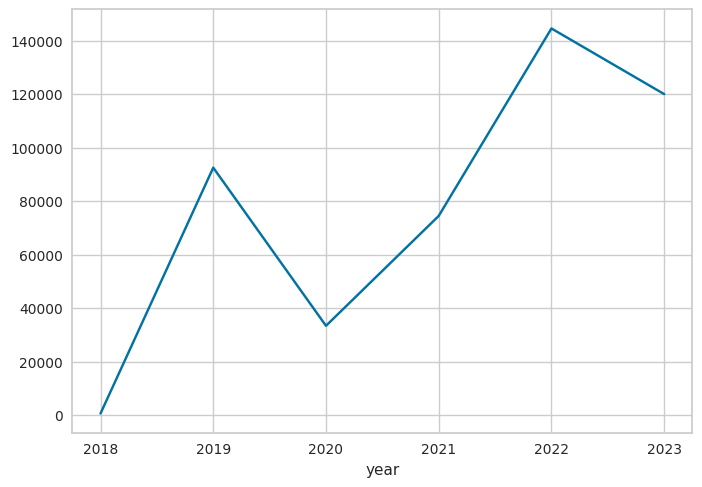

In [ ]:
(df_member.groupby('year').count().iloc[:,0]).plot()

<Axes: xlabel='year'>

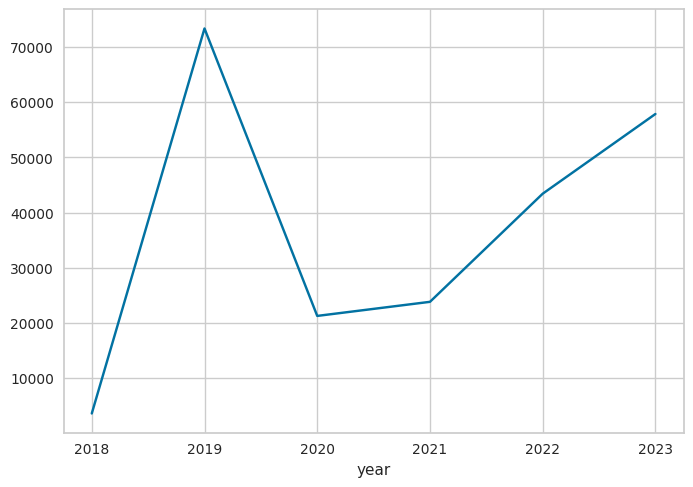

In [ ]:
(df_nomember.groupby('year').count().iloc[:,0]).plot()

<Axes: xlabel='year'>

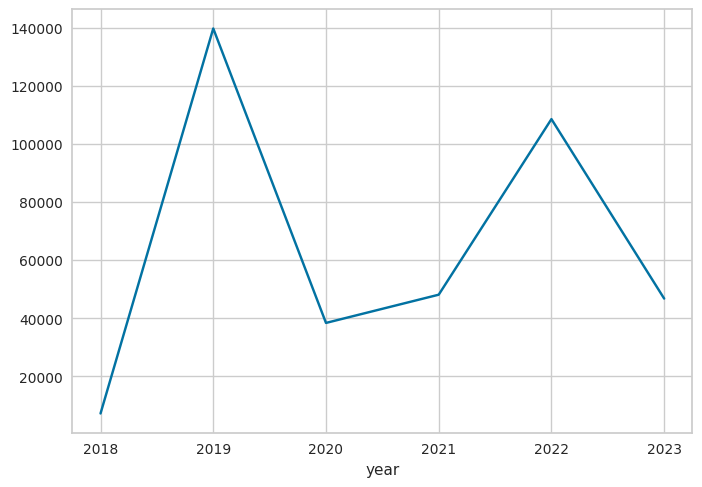

In [ ]:
(df_invite.groupby('year').count().iloc[:,0]).plot()

In [ ]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465549 entries, 0 to 465548
Data columns (total 55 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   age               465549 non-null  int64         
 1   gender            465549 non-null  object        
 2   tran_date         465549 non-null  datetime64[ns]
 3   tran_time         465549 non-null  object        
 4   play_date         465549 non-null  datetime64[ns]
 5   play_st_time      465549 non-null  object        
 6   seat              465549 non-null  object        
 7   price             465549 non-null  int64         
 8   ticket_cancel     465549 non-null  int64         
 9   discount_type     465549 non-null  object        
 10  performance_code  465549 non-null  int64         
 11  pre_open_date     465549 non-null  datetime64[ns]
 12  open_date         465549 non-null  datetime64[ns]
 13  genre             455000 non-null  object        
 14  plac

#**12. price에 관한 분석**

In [ ]:
df_member[df_member['price']!=0]

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,공간명,구분,대관사,유료,무료,합계,수기유료,수기무료,"국내총생산(시장가격, GDP)",국민총소득(GNI)
0,50,F,2022-01-14,15:12:00,2022-02-04,20:00:00,3층 BOX9 10,10000,2,일반,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,489254.3,474175.3
1,50,M,2022-02-06,16:15:00,2022-03-02,19:30:00,1층 B블록12열 7,180000,0,일반,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,489254.3,474175.3
2,30,F,2018-11-24,11:45:00,2019-03-23,20:00:00,1층 A블록2열 1,144000,2,블루회원 할인20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,457051.4,455335.0
3,50,F,2019-10-05,14:17:00,2019-12-01,17:00:00,3층 BOX9 5,24000,0,K-lang 멤버십 회원(1인2매)20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,469606.8,459578.1
4,50,M,2022-10-30,16:45:00,2022-12-27,20:00:00,2층 D블록8열 3,120000,2,일반,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,492581.2,468011.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465544,60,F,2018-12-23,12:27:00,2019-05-31,20:00:00,3층 N블록1열 8,10000,0,일반,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,462044.6,454944.1
465545,30,F,2023-05-16,17:43:00,2023-06-03,17:00:00,3층 D블록6열 6,40000,0,일반,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,497214.1,473597.5
465546,60,F,2021-06-18,15:09:00,2021-07-04,15:00:00,1층 A블록2열 2,90000,2,일반,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,479354.6,470671.5
465547,50,M,2023-05-22,17:29:00,2023-06-13,17:00:00,3층 A블록6열 4,10000,0,일반,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,497214.1,473597.5


In [ ]:
df_member[df_member['price']==0]

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,공간명,구분,대관사,유료,무료,합계,수기유료,수기무료,"국내총생산(시장가격, GDP)",국민총소득(GNI)
113414,60,F,2021-08-01,19:41:00,2021-08-05,20:00:00,합창석 G블록1열 27,0,0,차액,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,479354.6,470671.5
137632,50,M,2021-06-28,19:52:00,2021-07-02,20:00:00,합창석 G블록1열 11,0,0,차액,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,479354.6,470671.5
194478,60,M,2021-11-12,15:49:00,2021-12-03,19:30:00,1층 C블록22열 1,0,0,기획사(특별할인),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486043.7,472262.9


In [ ]:
df_nomember_pay = df_nomember[df_nomember['price']!=0]

In [ ]:
df_nomember_free = df_nomember[df_nomember['price']==0]

In [ ]:
df_nomember[df_nomember['price']==0].describe()

,price,ticket_cancel,performance_code,running_time,intermission,group_id,group_count,real_counts,sales_rate,seatcol,seatrow,holiday,weekday,play-tran,play-open,open-tran,tran_onlytime,play_onlytime,year,month
count,190519.0,190519.000000,190519.000000,190519.000000,190519.000000,190519.000000,190519.000000,190519.000000,190519.000000,190519.000000,190519.000000,22193.000000,190519.000000,190519.000000,190519.000000,190519.000000,190519.000000,190519.000000,190519.000000,190519.000000
mean,0.0,0.104745,1590.536450,115.174387,14.651557,354.957422,1310.690083,1225.916344,48.938776,9.355177,6.840095,0.064435,3.038196,26.255728,49.144626,22.888898,14.177862,18.862512,2020.795716,6.657598
std,0.0,0.445556,846.685123,16.822166,5.182729,249.163618,686.040570,652.038806,26.029493,6.125066,4.346839,0.245531,1.757258,37.470233,38.083155,31.955130,3.096192,2.086585,1.630644,3.231744
min,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,4.000000,4.000000,-337.000000,0.000000,10.000000,2018.000000,1.000000
25%,0.0,0.000000,959.000000,110.000000,15.000000,121.000000,821.000000,776.000000,30.978044,4.000000,3.000000,0.000000,1.000000,10.000000,31.000000,6.000000,12.000000,17.000000,2019.000000,4.000000
50%,0.0,0.000000,1533.000000,120.000000,15.000000,316.000000,1343.000000,1168.000000,46.626747,7.000000,6.000000,0.000000,3.000000,19.000000,41.000000,18.000000,14.000000,20.000000,2021.000000,6.000000
75%,0.0,0.000000,2220.000000,120.000000,15.000000,595.000000,1823.000000,1778.000000,70.978044,15.000000,10.000000,0.000000,5.000000,32.000000,54.000000,36.000000,16.000000,20.000000,2022.000000,10.000000
max,0.0,2.000000,2938.000000,240.000000,30.000000,742.000000,2721.000000,2479.000000,98.962076,22.000000,37.000000,1.000000,6.000000,375.000000,397.000000,357.000000,23.000000,20.000000,2023.000000,12.000000


In [ ]:
df_invite[df_invite['price']==0].describe()

,age,price,ticket_cancel,performance_code,running_time,intermission,group_id,group_count,real_counts,sales_rate,...,seatrow,tran_onlytime,play_onlytime,holiday,weekday,play-tran,play-open,open-tran,year,month
count,388823.0,388823.0,388823.000000,388823.000000,388823.000000,388823.000000,388823.000000,388823.000000,388823.000000,388823.000000,...,388823.000000,388823.000000,388823.000000,78478.000000,388823.000000,388823.000000,388823.000000,388823.000000,388823.000000,388823.000000
mean,0.0,0.0,0.104958,1370.683627,110.348009,14.667458,261.624922,1588.282488,1480.656885,59.108059,...,6.778789,14.057355,18.951652,0.042764,3.404040,16.267356,40.015310,23.747955,2020.646438,6.985922
std,0.0,0.0,0.445982,924.655407,16.699979,5.744602,172.416905,853.480877,731.844048,29.215331,...,4.336612,2.853666,1.598524,0.202325,1.844397,12.800183,24.841491,26.661499,1.529435,3.480227
min,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,9.000000,10.000000,0.000000,1.000000,4.000000,4.000000,-40.000000,2018.000000,1.000000
25%,0.0,0.0,0.000000,435.000000,100.000000,15.000000,104.000000,873.000000,858.000000,34.251497,...,3.000000,11.000000,17.000000,0.000000,2.000000,6.000000,25.000000,5.000000,2019.000000,4.000000
50%,0.0,0.0,0.000000,1292.000000,110.000000,15.000000,245.000000,1595.000000,1512.000000,60.359281,...,6.000000,14.000000,20.000000,0.000000,3.000000,11.000000,35.000000,19.000000,2021.000000,7.000000
75%,0.0,0.0,0.000000,2217.000000,120.000000,20.000000,431.000000,2192.000000,2191.000000,87.465070,...,10.000000,16.000000,20.000000,0.000000,5.000000,23.000000,51.000000,37.000000,2022.000000,10.000000
max,0.0,0.0,2.000000,2938.000000,240.000000,30.000000,549.000000,4907.000000,2714.000000,108.343313,...,37.000000,22.000000,20.000000,1.000000,6.000000,377.000000,397.000000,393.000000,2023.000000,12.000000


In [ ]:
df_invite[df_invite['price']!=0].describe()

,age,price,ticket_cancel,performance_code,running_time,intermission,group_id,group_count,real_counts,sales_rate,...,seatrow,tran_onlytime,play_onlytime,holiday,weekday,play-tran,play-open,open-tran,year,month
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.0,50000.0,2.0,2231.0,120.0,0.0,537.0,2466.0,2465.0,98.403194,...,1.0,11.0,20.0,0.0,2.0,45.0,51.0,6.0,2023.0,5.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,50000.0,2.0,2231.0,120.0,0.0,537.0,2466.0,2465.0,98.403194,...,1.0,11.0,20.0,0.0,2.0,45.0,51.0,6.0,2023.0,5.0
25%,0.0,50000.0,2.0,2231.0,120.0,0.0,537.0,2466.0,2465.0,98.403194,...,1.0,11.0,20.0,0.0,2.0,45.0,51.0,6.0,2023.0,5.0
50%,0.0,50000.0,2.0,2231.0,120.0,0.0,537.0,2466.0,2465.0,98.403194,...,1.0,11.0,20.0,0.0,2.0,45.0,51.0,6.0,2023.0,5.0
75%,0.0,50000.0,2.0,2231.0,120.0,0.0,537.0,2466.0,2465.0,98.403194,...,1.0,11.0,20.0,0.0,2.0,45.0,51.0,6.0,2023.0,5.0
max,0.0,50000.0,2.0,2231.0,120.0,0.0,537.0,2466.0,2465.0,98.403194,...,1.0,11.0,20.0,0.0,2.0,45.0,51.0,6.0,2023.0,5.0


In [ ]:
df_member[df_member['block']=='합창석']

,age,gender,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,...,공간명,구분,대관사,유료,무료,합계,수기유료,수기무료,"국내총생산(시장가격, GDP)",국민총소득(GNI)


In [ ]:
df_member[(df_member['floor']=='합창석')].groupby(by=['block'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
block,,,,,,,,
F,8921.0,49614.393005,33803.205051,5000.0,28000.0,45000.0,57000.0,190000.0
G,16364.0,54958.445368,38250.810089,0.0,30000.0,47000.0,66000.0,250000.0
H,9534.0,56592.091462,36332.578951,1000.0,30000.0,50000.0,76000.0,190000.0


In [ ]:
df_nomember[df_nomember['price']!=0]

,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,...,weekday,play-tran,play-pre_open,play-open,pre_open-tran,open-tran,tran_onlytime,play_onlytime,year,month
13,2022-06-24,16:18:00,2022-06-29,19:30:00,3층 BOX12 3,20000,2,일반,2344,2022-04-30,...,2,5,60,60,0,55,16,20,2022,6
84,2019-04-05,12:45:00,2019-05-18,17:00:00,1층 D블록13열 3,15000,0,단체100인이상50%,1565,2019-04-05,...,5,43,43,43,0,0,13,17,2019,5
98,2023-05-07,21:30:00,2023-07-01,17:00:00,3층 BOX11 5,40000,0,일반,2822,2023-05-05,...,5,55,57,55,2,0,22,17,2023,7
148,2022-10-10,19:38:00,2022-10-14,19:30:00,2층 E블록4열 6,50000,0,일반,2730,2022-08-20,...,4,4,55,54,1,50,20,20,2022,10
202,2019-02-28,14:17:00,2019-07-13,17:00:00,2층 A블록5열 6,90000,0,일반,1828,2019-02-22,...,5,135,141,139,2,4,14,17,2019,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920675,2023-06-17,13:54:00,2023-06-29,19:30:00,1층 D블록3열 10,35000,2,스탭 할인30%,2835,2023-05-05,...,3,12,55,53,2,41,14,20,2023,6
1920678,2021-11-30,16:32:00,2021-12-04,17:00:00,2층 E블록8열 1,10000,0,차액,121,2021-09-10,...,5,4,85,85,0,81,17,17,2021,12
1920759,2023-05-08,10:46:00,2023-06-24,17:00:00,2층 D블록6열 8,45000,0,문화릴레이(1인2매/공연유료티켓제시)10%,2830,2023-05-05,...,5,47,50,48,2,1,11,17,2023,6
1920761,2019-04-05,12:43:00,2019-05-18,17:00:00,1층 C블록7열 9,15000,0,단체100인이상50%,1565,2019-04-05,...,5,43,43,43,0,0,13,17,2019,5


In [ ]:
df_nomember_pay['discount_type'].value_counts()

일반                         15125
스탭 할인30%                    2844
차액                          2570
문화릴레이(1인2매/공연유료티켓제시)10%     1768
장애인/국가유공자 할인50%             1570
                           ...  
2020 정기회원전체패키지 구매고객20%         1
조기예매(11월10일까지)30%              1
노블회원 할인50%                     1
예술인패스(본인만)30%                  1
현대카드 할인30%                     1
Name: discount_type, Length: 386, dtype: int64

In [ ]:
df_nomember_free['discount_type'].value_counts()

기획사판매             137520
공연진행석              12507
기획사                 9539
한화초대석               6767
홍보진행                6119
정기회원                5367
우리카드 우수회원           3005
신세계석                2560
한화생명                2223
KT석                 1869
문화햇살                1740
기획사할인                251
기업석                  203
중앙일보 JTBC            202
BC카드                 158
후원회석                 138
중앙일보 JTBC 초대권        100
신한은행                  50
국립심포니                 40
기획사 판매30%             31
기획사 판매20%             29
기획사할인40%              23
홍보마케팅                 22
클립서비스(기업)20%할인        18
차액                    16
Art+초대                10
홍보진행석                  6
기획사(특별할인)              6
Name: discount_type, dtype: int64

In [ ]:
df_nomember_pay['discount_type'].apply(lambda x: extract_discount_percentage(x)).value_counts()

일반                     15125
30                      4427
50                      4386
차액                      2570
10                      2058
당일할인티켓_                 1039
20                       918
40                       691
15                       487
기획사할인                    444
25                       121
5                         85
60                        81
특판B                       65
당일할인티켓                    62
75                        39
초/중/고/대학생 할인(본인만)         29
초/중/고등학생 할인(본인만)          22
일만원의 나눔                   17
공연진행석                     16
하비에르 국제학교 학부모, 직원         15
2+1 특별할인                   9
특판A                        9
하비에르 국제학교 재학생              9
특판D                        7
기획사                        6
초/중/고등학생 할인                4
35                         4
수험생 할인(동반1인)               3
특별할인(2+1)                  3
이만원의 기쁨                    2
공연예매권                      2
80                         2
초/중/고/대학생(본인)+음반패키지        1
Name: discount

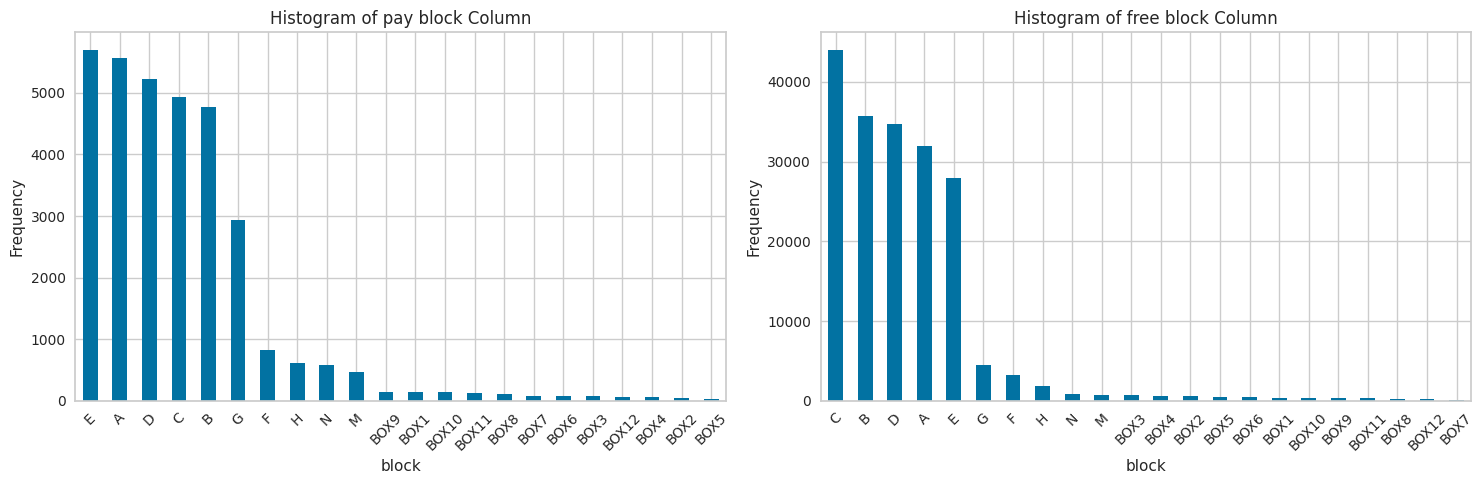

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df_nomember_pay['block'].value_counts().plot(kind='bar')
plt.xlabel('block')
plt.ylabel('Frequency')
plt.xticks(rotation=45,size=10)
plt.title('Histogram of pay block Column')
plt.tight_layout()
plt.subplot(1,2,2)
df_nomember_free['block'].value_counts().plot(kind='bar')
plt.xlabel('block')
plt.ylabel('Frequency')
plt.xticks(rotation=45,size=10)
plt.title('Histogram of free block Column')
plt.tight_layout()
plt.show()

#**13. 클러스터링**

In [ ]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465549 entries, 0 to 465548
Data columns (total 55 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   age               465549 non-null  int64         
 1   gender            465549 non-null  object        
 2   tran_date         465549 non-null  datetime64[ns]
 3   tran_time         465549 non-null  object        
 4   play_date         465549 non-null  datetime64[ns]
 5   play_st_time      465549 non-null  object        
 6   seat              465549 non-null  object        
 7   price             465549 non-null  int64         
 8   ticket_cancel     465549 non-null  int64         
 9   discount_type     465549 non-null  object        
 10  performance_code  465549 non-null  int64         
 11  pre_open_date     465549 non-null  datetime64[ns]
 12  open_date         465549 non-null  datetime64[ns]
 13  genre             455000 non-null  object        
 14  plac

In [ ]:
df_nomember.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223277 entries, 13 to 1920858
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   tran_date         223277 non-null  datetime64[ns]
 1   tran_time         223277 non-null  object        
 2   play_date         223277 non-null  datetime64[ns]
 3   play_st_time      223277 non-null  object        
 4   seat              223277 non-null  object        
 5   price             223277 non-null  int64         
 6   ticket_cancel     223277 non-null  int64         
 7   discount_type     223277 non-null  object        
 8   performance_code  223277 non-null  int64         
 9   pre_open_date     223277 non-null  datetime64[ns]
 10  open_date         223277 non-null  datetime64[ns]
 11  genre             216546 non-null  object        
 12  place             223277 non-null  object        
 13  running_time      223277 non-null  int64         
 14  in

In [ ]:
df_member.drop(columns=['real_counts'],inplace=True)

In [ ]:
df_member2 = df_member[df_member['ticket_cancel']!=2]
real_count_member = df_member2.groupby(by=['play_date', 'play_st_time', 'performance_code'])['price'].count().reset_index()
real_count_member = real_count_member.rename(columns={'price': 'real_counts'})
df_member = df_member.merge(real_count_member, on=['play_date', 'play_st_time', 'performance_code'], how='left')


In [ ]:
df_nomember.drop(columns=['real_counts'],inplace=True)

In [ ]:
df_nomember2 = df_nomember[df_nomember['ticket_cancel']!=2]
real_count_nomember = df_nomember2.groupby(by=['play_date', 'play_st_time', 'performance_code'])['price'].count().reset_index()
real_count_nomember = real_count_nomember.rename(columns={'price': 'real_counts'})
df_nomember = df_nomember.merge(real_count_nomember, on=['play_date', 'play_st_time', 'performance_code'], how='left')
df_nomember['real_counts'].fillna(np.min(df_nomember['real_counts']),inplace=True)

In [ ]:
df_invite.drop(columns=['real_counts'],inplace=True)

In [ ]:
df_invite2 = df_invite[df_invite['ticket_cancel']!=2]
real_count_invite = df_invite2.groupby(by=['play_date', 'play_st_time', 'performance_code'])['price'].count().reset_index()
real_count_invite = real_count_invite.rename(columns={'price': 'real_counts'})
df_invite = df_invite.merge(real_count_invite, on=['play_date', 'play_st_time', 'performance_code'], how='left')
df_invite['real_counts'].fillna(np.min(df_invite['real_counts']),inplace=True)

In [ ]:
df_member2=pd.get_dummies(df_member,columns=['구분','floor','block'])
df_nomember2=pd.get_dummies(df_nomember,columns=['floor','block'])
df_invite2=pd.get_dummies(df_invite,columns=['floor','block'])

In [ ]:
selected_columns=[
'price',
'real_counts',
'floor_1층', 'floor_2층',
       'floor_3층', 'floor_합창석', 'block_A', 'block_B', 'block_BOX1',
       'block_BOX10', 'block_BOX11', 'block_BOX12', 'block_BOX2', 'block_BOX3',
       'block_BOX4', 'block_BOX5', 'block_BOX6', 'block_BOX7', 'block_BOX8',
       'block_BOX9', 'block_C', 'block_D', 'block_E', 'block_F', 'block_G',
       'block_H', 'block_M', 'block_N',
'seatcol',
'seatrow']
df_selected_cleaned=df_member2[selected_columns]
dfcluster=df_selected_cleaned[selected_columns]

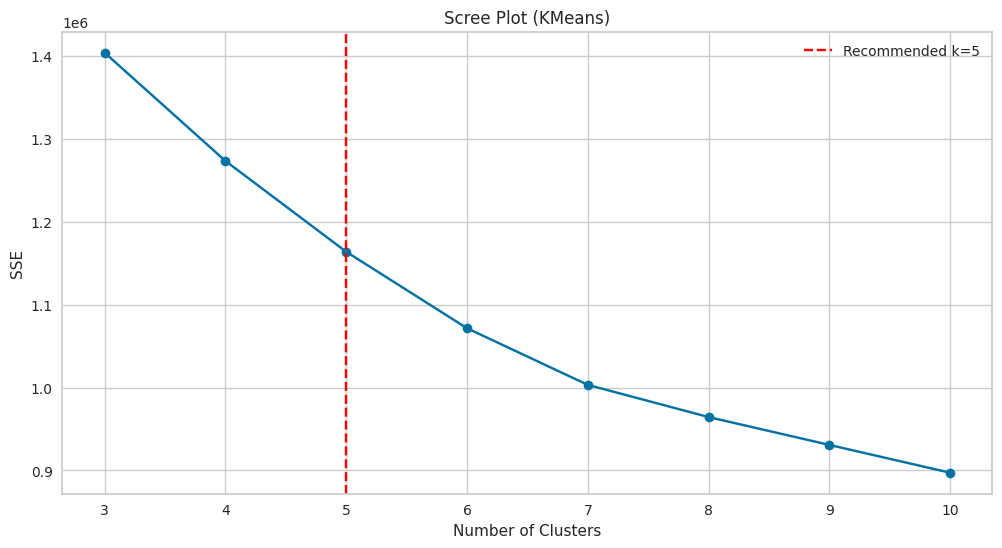

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
# 클러스터의 수에 따른 SSE를 계산하는 함수
def compute_sse(data, max_clusters):
    sse = []
    for k in range(3, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    return sse

# 'elbow' 지점을 찾는 함수
def find_elbow(sse):
    deltas = np.diff(sse)
    double_deltas = np.diff(deltas)
    return np.argmax(double_deltas) + 2  # +2는 첫 번째 diff에서의 인덱스 감소와 1부터 시작하는 클러스터 수를 고려

Scaler2 = RobustScaler()
df_scaled2 = Scaler2.fit_transform(dfcluster)

# Scree plot 그리기
max_clusters = 10
sse = compute_sse(df_scaled2, max_clusters)
elbow_point = find_elbow(sse)

plt.figure(figsize=(12, 6))
plt.plot(range(3, max_clusters+1), sse, 'o-')
plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Recommended k={elbow_point}')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Scree Plot (KMeans)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X_pca_3ds=[]
clusters0=[]
# 1. 데이터 스케일링
scaler = RobustScaler()
df_scaled = scaler.fit_transform(dfcluster)
for j in range(2,11):
# 2. KMeans 클러스터링 (k) 수행
    kmeans = KMeans(n_clusters=j, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)
    clusters0.append(clusters)
# 3. PCA 변환
    pca_2d = PCA(n_components=2)
    pca_3d = PCA(n_components=3)

    X_pca_2d = pca_2d.fit_transform(df_scaled)
    X_pca_3d = pca_3d.fit_transform(df_scaled)
    X_pca_3ds.append(X_pca_3d)
# 4. 2D 시각화
    plt.figure(figsize=(16, 12))
    plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=clusters, cmap='tab10', s=50)
    plt.title("2D PCA Clustering Visualization")
    plt.colorbar()
    plt.show()

# 5. 3D 시각화
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=clusters, cmap='tab10', s=50)
    ax.set_title("3D PCA Clustering Visualization")
    plt.colorbar(scatter)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
dfcluster['cluster']=clusters0[3]
dfcluster_member=dfcluster.copy()

In [ ]:
df_selected_cleaned=df_nomember2[selected_columns]
dfcluster=df_selected_cleaned[selected_columns]

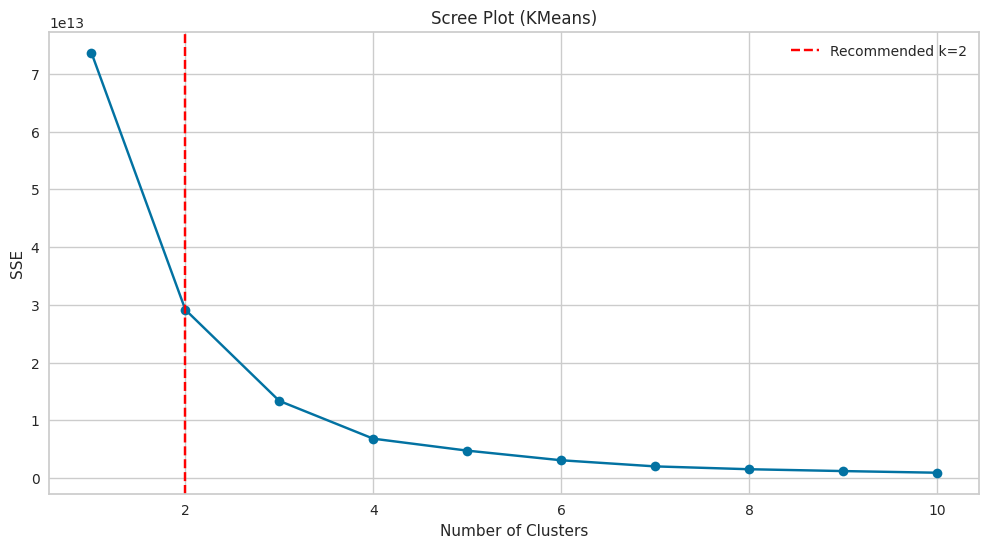

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
# 클러스터의 수에 따른 SSE를 계산하는 함수
def compute_sse(data, max_clusters):
    sse = []
    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    return sse

# 'elbow' 지점을 찾는 함수
def find_elbow(sse):
    deltas = np.diff(sse)
    double_deltas = np.diff(deltas)
    return np.argmax(double_deltas) + 2  # +2는 첫 번째 diff에서의 인덱스 감소와 1부터 시작하는 클러스터 수를 고려

Scaler2 = RobustScaler()
df_scaled2 = Scaler2.fit_transform(dfcluster)

# Scree plot 그리기
max_clusters = 10
sse = compute_sse(df_scaled2, max_clusters)
elbow_point = find_elbow(sse)

plt.figure(figsize=(12, 6))
plt.plot(range(1, max_clusters+1), sse, 'o-')
plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Recommended k={elbow_point}')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Scree Plot (KMeans)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X_pca_3ds=[]
clusters0=[]
# 1. 데이터 스케일링
scaler = RobustScaler()
df_scaled = scaler.fit_transform(dfcluster)
for j in range(2,11):
# 2. KMeans 클러스터링 (k) 수행
    kmeans = KMeans(n_clusters=j, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)
    clusters0.append(clusters)
# 3. PCA 변환
    pca_2d = PCA(n_components=2)
    pca_3d = PCA(n_components=3)

    X_pca_2d = pca_2d.fit_transform(df_scaled)
    X_pca_3d = pca_3d.fit_transform(df_scaled)
    X_pca_3ds.append(X_pca_3d)
# 4. 2D 시각화
    plt.figure(figsize=(16, 12))
    plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=clusters, cmap='tab10', s=50)
    plt.title("2D PCA Clustering Visualization")
    plt.colorbar()
    plt.show()

# 5. 3D 시각화
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=clusters, cmap='tab10', s=50)
    ax.set_title("3D PCA Clustering Visualization")
    plt.colorbar(scatter)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
dfcluster['cluster']=clusters0[2]
dfcluster_nomember=dfcluster.copy()

In [ ]:
df_selected_cleaned=df_invite2[selected_columns]
dfcluster=df_selected_cleaned[selected_columns]

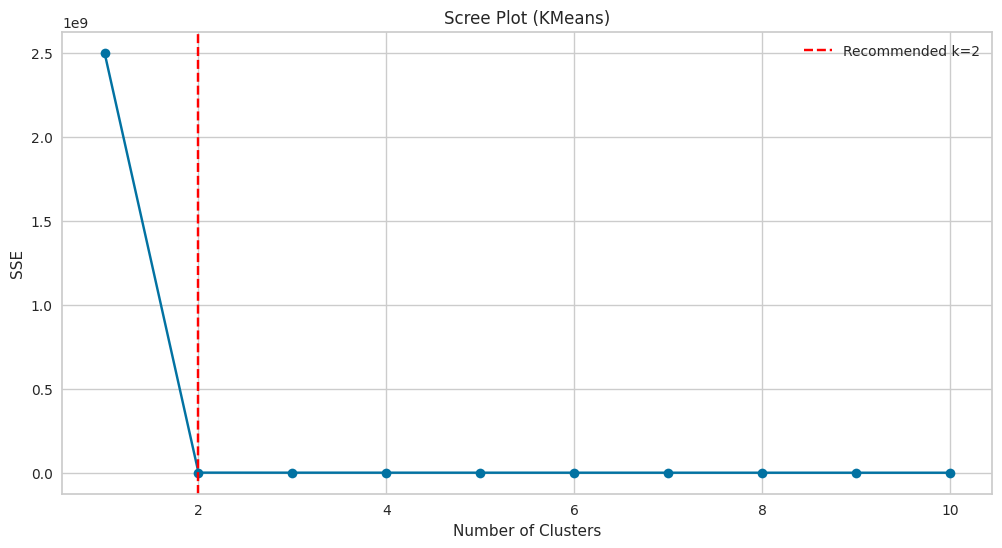

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
# 클러스터의 수에 따른 SSE를 계산하는 함수
def compute_sse(data, max_clusters):
    sse = []
    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    return sse

# 'elbow' 지점을 찾는 함수
def find_elbow(sse):
    deltas = np.diff(sse)
    double_deltas = np.diff(deltas)
    return np.argmax(double_deltas) + 2  # +2는 첫 번째 diff에서의 인덱스 감소와 1부터 시작하는 클러스터 수를 고려

Scaler2 = RobustScaler()
df_scaled2 = Scaler2.fit_transform(dfcluster)

# Scree plot 그리기
max_clusters = 10
sse = compute_sse(df_scaled2, max_clusters)
elbow_point = find_elbow(sse)

plt.figure(figsize=(12, 6))
plt.plot(range(1, max_clusters+1), sse, 'o-')
plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Recommended k={elbow_point}')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Scree Plot (KMeans)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X_pca_3ds=[]
clusters0=[]
# 1. 데이터 스케일링
scaler = RobustScaler()
df_scaled = scaler.fit_transform(dfcluster)
for j in range(2,11):
# 2. KMeans 클러스터링 (k) 수행
    kmeans = KMeans(n_clusters=j, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)
    clusters0.append(clusters)
# 3. PCA 변환
    pca_2d = PCA(n_components=2)
    pca_3d = PCA(n_components=3)

    X_pca_2d = pca_2d.fit_transform(df_scaled)
    X_pca_3d = pca_3d.fit_transform(df_scaled)
    X_pca_3ds.append(X_pca_3d)
# 4. 2D 시각화
    plt.figure(figsize=(16, 12))
    plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=clusters, cmap='tab10', s=50)
    plt.title("2D PCA Clustering Visualization")
    plt.colorbar()
    plt.show()

# 5. 3D 시각화
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=clusters, cmap='tab10', s=50)
    ax.set_title("3D PCA Clustering Visualization")
    plt.colorbar(scatter)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
dfcluster['cluster']=clusters0[2]
dfcluster_invite=dfcluster.copy()

In [ ]:
df_member2['cluster']=dfcluster_member['cluster']

In [ ]:
df_member=df_member2.copy()

In [ ]:
df_member['real_count']=df_member['real_counts']

#**14. 가격 모델 제작**


In [ ]:
!pip install pycaret

In [ ]:
import scipy

In [ ]:
import pycaret
from pycaret.regression import *
import pandas as pd

In [ ]:
# 공연을 열 때는 real_count 값을 모르기 때문에 제거하고 예측 모델 제작
price_model_data = df_member.drop(['real_count', 'sales_rate'], axis = 1)

In [ ]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465549 entries, 0 to 465548
Data columns (total 80 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   age               465549 non-null  int64         
 1   gender            465549 non-null  object        
 2   tran_date         465549 non-null  datetime64[ns]
 3   tran_time         465549 non-null  object        
 4   play_date         465549 non-null  datetime64[ns]
 5   play_st_time      465549 non-null  object        
 6   seat              465549 non-null  object        
 7   price             465549 non-null  int64         
 8   ticket_cancel     465549 non-null  int64         
 9   discount_type     465549 non-null  object        
 10  performance_code  465549 non-null  int64         
 11  pre_open_date     465549 non-null  datetime64[ns]
 12  open_date         465549 non-null  datetime64[ns]
 13  genre             455000 non-null  object        
 14  plac

In [ ]:
df_member['유료']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
465544   NaN
465545   NaN
465546   NaN
465547   NaN
465548   NaN
Name: 유료, Length: 465549, dtype: float64

In [ ]:
price_model_data = price_model_data[['age','gender','holiday','weekday','cluster','seatcol','seatrow','year','month','open-tran','play-tran',
                   'play_onlytime', 'GDP', 'GNI', '골드', '블루','그린','싹틔우미','노블','price',
                    '구분_기획', '구분_대관', 'block_A', 'block_B', 'block_BOX1',
       'block_BOX10', 'block_BOX11', 'block_BOX12', 'block_BOX2', 'block_BOX3',
       'block_BOX4', 'block_BOX5', 'block_BOX6', 'block_BOX7', 'block_BOX8',
       'block_BOX9', 'block_C', 'block_D', 'block_E', 'block_F', 'block_G',
       'block_H', 'block_M', 'block_N', 'floor_1층', 'floor_2층', 'floor_3층',
       'floor_합창석']]

KeyError: ignored

In [ ]:
train_p = price_model_data.sample(frac=0.85, random_state=12345)
validation_p = price_model_data.drop(train_p.index)
train_p.reset_index(inplace=True, drop=True)
validation_p.reset_index(inplace=True, drop=True)

In [ ]:
exp_1 = setup(train_p, fold=5, target='price',normalize=True,normalize_method='robust', session_id = 123)

In [ ]:
model_p = create_model('et')

#**15. 수요 모델 제작**

In [ ]:
demand_model_data = df_member.drop(['sales_rate', 'ticket_cancel'], axis = 1)

In [ ]:
demand_model_data = demand_model_data[['age','gender','holiday','weekday','cluster', 'real_count',
                   'seatcol','seatrow','year','month','open-tran','play-tran',
                   'play_onlytime', 'GDP', 'GNI', '골드', '블루','그린','일반','싹틔우미','노블', 'price',
                    '구분_기획', '구분_대관', 'block_A', 'block_B', 'block_BOX1',
       'block_BOX10', 'block_BOX11', 'block_BOX12', 'block_BOX2', 'block_BOX3',
       'block_BOX4', 'block_BOX5', 'block_BOX6', 'block_BOX7', 'block_BOX8',
       'block_BOX9', 'block_C', 'block_D', 'block_E', 'block_F', 'block_G',
       'block_H', 'block_M', 'block_N', 'floor_1층', 'floor_2층', 'floor_3층',
       'floor_합창석']]

In [ ]:
demand_model_data = demand_model_data[demand_model_data['year']!=2020]

In [ ]:
train_d = demand_model_data.sample(frac=0.85, random_state=12345)
validation_d = demand_model_data.drop(train_d.index)
train_d.reset_index(inplace=True, drop=True)
validation_d.reset_index(inplace=True, drop=True)

In [ ]:
exp_1 = setup(train_d, fold=5, target='real_count',normalize=True,normalize_method='robust', session_id = 123)

In [ ]:
model_d = create_model('et')

dfda123ddafdf#**16. 최종 알고리즘**

In [ ]:
price_model_x_list = ['age','gender','holiday','weekday','cluster','seatcol','seatrow','year','month','open-tran','play-tran',
                   'play_onlytime', 'GDP', 'GNI', '골드', '블루','그린','싹틔우미','노블','price',
                    '구분_기획', '구분_대관', 'block_A', 'block_B', 'block_BOX1',
       'block_BOX10', 'block_BOX11', 'block_BOX12', 'block_BOX2', 'block_BOX3',
       'block_BOX4', 'block_BOX5', 'block_BOX6', 'block_BOX7', 'block_BOX8',
       'block_BOX9', 'block_C', 'block_D', 'block_E', 'block_F', 'block_G',
       'block_H', 'block_M', 'block_N', 'floor_1층', 'floor_2층', 'floor_3층',
       'floor_합창석']
demand_model_x_list = ['age','gender','holiday','weekday','cluster', 'real_count',
                   'seatcol','seatrow','year','month','open-tran','play-tran',
                   'play_onlytime', 'GDP', 'GNI', '골드', '블루','그린','일반','싹틔우미', '노블', 'price',
                    '구분_기획', '구분_대관', 'block_A', 'block_B', 'block_BOX1',
       'block_BOX10', 'block_BOX11', 'block_BOX12', 'block_BOX2', 'block_BOX3',
       'block_BOX4', 'block_BOX5', 'block_BOX6', 'block_BOX7', 'block_BOX8',
       'block_BOX9', 'block_C', 'block_D', 'block_E', 'block_F', 'block_G',
       'block_H', 'block_M', 'block_N', 'floor_1층', 'floor_2층', 'floor_3층',
       'floor_합창석']

In [ ]:
def algorithm_plus(price_model, demand_model, num, member):
    final_list = []

    for i in range(5):
      best_profit = []
      price_demand_pairs = []

      train = member[member['cluster']==i].sample(frac=0.85, random_state=12345)
      validation = member[member['cluster']==i].drop(train.index)

      train_p = train[price_model_x_list]
      train_d = train[demand_model_x_list]
      price_val1 = validation[price_model_x_list]
      demand_val1 = validation[demand_model_x_list]

      exp = setup(train_p, fold=5, target='price', normalize=True, normalize_method='robust', session_id=123)
      price_pred = predict_model(model1_price, data=price_val1)

      for j in range(num):
              price_pred['prediction_label'] += 100
              demand_val1['price'] = price_pred['prediction_label']

              exp = setup(train_d, fold=5, target='real_count', normalize=True, normalize_method='robust', session_id=123)
              demand_pred = predict_model(blend_demand, data=demand_val1)

              final = validation.copy()
              final['pred_price'] = price_pred['prediction_label']
              final['pred_real_count'] = demand_pred['prediction_label']

              # (price, demand) 쌍을 리스트에 추가
              price_demand_pairs.append((price_pred['prediction_label'].mean(), demand_pred['prediction_label'].mean()))

              final_profit = final.agg({
                  'price': 'mean',
                  'real_count': 'sum',
                  'pred_price': 'mean',
                  'pred_real_count': 'sum'
              }).reset_index()
              pred_profit = final['pred_price'] * final['pred_real_count']

              # 최고 수익 업데이트
              best_profit.append(max(pred_profit))

          # 최고 수익을 제공하는 (price, demand) 쌍 찾기
      best_index = best_profit.index(max(best_profit))
      best_pair = price_demand_pairs[best_index]
      final_list.append([best_pair, max(best_profit)])

    return final_list

def algorithm_minus(price_model, demand_model, num, member):
    final_list = []

    for i in range(5):
      best_profit = []
      price_demand_pairs = []

      train = member[member['cluster']==i].sample(frac=0.85, random_state=12345)
      validation = member[member['cluster']==i].drop(train.index)

      train_p = train[price_model_x_list]
      train_d = train[demand_model_x_list]
      price_val1 = validation[price_model_x_list]
      demand_val1 = validation[demand_model_x_list]

      exp = setup(train_p, fold=5, target='price', normalize=True, normalize_method='robust', session_id=123)
      price_pred = predict_model(model1_price, data=price_val1)

      for j in range(num):
              price_pred['prediction_label'] -= 100
              demand_val1['price'] = price_pred['prediction_label']

              exp = setup(train_d, fold=5, target='real_count', normalize=True, normalize_method='robust', session_id=123)
              demand_pred = predict_model(blend_demand, data=demand_val1)

              final = validation.copy()
              final['pred_price'] = price_pred['prediction_label']
              final['pred_real_count'] = demand_pred['prediction_label']

              # (price, demand) 쌍을 리스트에 추가
              price_demand_pairs.append((price_pred['prediction_label'].mean(), demand_pred['prediction_label'].mean()))

              final_profit = final.agg({
                  'price': 'mean',
                  'real_count': 'sum',
                  'pred_price': 'mean',
                  'pred_real_count': 'sum'
              }).reset_index()
              pred_profit = final['pred_price'] * final['pred_real_counts']

              # 최고 수익 업데이트
              best_profit.append(max(pred_profit))

          # 최고 수익을 제공하는 (price, demand) 쌍 찾기
      best_index = best_profit.index(max(best_profit))
      best_pair = price_demand_pairs[best_index]
      final_list.append([best_pair, max(best_profit)])

    return final_list

In [ ]:
plus = algorithm_plus(model_p, model_d, num=3, df_member)
minus = algorithm_minus(model_p, model_d, num=3, df_member)

In [ ]:
final = []
for i in range(5):
  if plus[i][1] > minus[i][1]:
    final.append(plus[i])
  else:
    final.append(minus[i])

In [ ]:
print(final)